## Project Phase V
INFO 2950 <br>
12 May 2021 <br>
Ava Chen (ac2572), Lauren Crosbie-Walsh (lmc348), Elita Gao (eg556), Kate Hofer (klh253)

****
## Table of Contents:
* Introduction
* Data Description
* Preregistration Statement
* Data Analysis
* Evaluation of Significance
* Interpretations and Conclusions
* Limitations
* Source Code
* Acknowledgments
* Appendix
* Other Appendices

*******
## Introduction 

All across social media platforms, there are running advertisements for different beauty products. According to [GlobalNewswire](https://loudcloudhealth.com/resources/beauty-industry-statistics/#:~:text=How%20much%20is%20the%20cosmetic,value%20is%20over%20%2493%20billion), the global skincare market is worth \$145.3 billion. Skincare is a very important market segment to examine as it accounts for 40% of the global cosmetic market. On YouTube, there are many skincare specialists such as Hyram (Instagram: [@skincarebyhyram](https://www.instagram.com/skincarebyhyram/)), Sarah Cheung (Instagram: [@sacheu](https://www.instagram.com/sacheu/)), and Renee (Instagram: [@gothamista](https://www.instagram.com/gothamista/)) among many others who have amassed a huge following. These influencers produce video about skincare product recommendations, skincare routines within specific budgets, for specific skin concerns, must-haves and more. 

As skin care-enthusiasts and the target group for sponsored social media advertisements, products are always flooding our feeds to shop the latest skin care product releases. This piqued our group's interest to dive deeper into the skincare area in search of better understanding how exactly products differentiate themselves from others in terms of better results, lowest cost, and best rating. 

One important ingredient we will be analyzing is the use of parabens in skincare products. Parabens are a family of chemicals that are commonly used to prolong the life of certain skincare, beauty and cosmetic products. The parabens work to prevent the growth of harmful bacteria and mold, which protects the consumer and the product itself.

The parabens used most commonly in cosmetics are methylparaben, propylparaben, butylparaben, and ethylparaben. Although we do not have any concrete evidence proving that parabens cause cancer, a number of studies have found  traces of parabens in breast cancer tissue samples. Although this doesn’t prove that parabens cause cancer, it does show that parabens can pass through out skin and into our bodies- potentially causing harm.

By working with a skin care dataset from Sephora, our group hopes to answer several questions:
- Are expensive products worth the cost? 
- Do high-end brands get better ratings?
- Do products containing parabens have statistically significant differential ratings and prices from those that do not.  

By answering these questions, we hope to shed light on how to shop for skincare products, and whether highly rated products are worth the hype by examining the quality  of ingredients.
 
Below is a brief summary of our findings:<br>
We determined there is no statistically significant difference in rating between those of high-end products and drugstore/mid-priced items. Price is also not a statistically significant predictor of product rating. Additionally, while a product that contains parabens is on average \$26.07 more expensive than a product that does not contain parabens, the inclusion of parabens in a product is not a statistically significant indicator of the product’s ranking. 



******
## Data Description

**To answer these questions, we will be exploring the relationships between the price, average ratings, ingredients, product categories, brand and skin type fit.**  

### Dataset 1 (Sephora):
- Dataset 1 was created by Jiwon Jeong (GitHub user jjone36) for a Cosmetic Recommendation System on November 28, 2018. Here is the article that describes her scraping and analysis process: https://towardsdatascience.com/for-your-skin-beauty-mapping-cosmetic-items-with-bokeh-af7523ca68e5.
- Observations: skincare product items. Attributes include its price, brand, rank, ingredients, and for what skin type for whom the product would be most useful. Each row corresponds to one product.
- Since it is difficult to choose what cosmetic items fit for different skin types, the creator decided to build a simple cosmetic recommendation system.
- It is unclear who funded the creation of the dataset. Since the dataset does not involve experimental data but rather observational data, it is possible that no funding was required.
- The skincare products may not be representative of all brands because the creator only used data from Sephora and not only cosmetic stores. Because of this, prices may also not be the original prices from the brands themselves but marked by Sephora. In addition, it is possible that these products have changed from 2018 to now.
- The dataset that we are using is the original dataset that the creator had not preprocessed. We wanted to start from scratch for more data-cleaning practice and learning. In addition, our research question differs from the creator’s. Rather than re-building the cosmetic recommendation system that she had built, we instead are examining any correlations between the rank and price of cosmetic items between different brands and for different skin types.
- The people involved in data collection contributed to the 'rank' column for their average reviews.
- Our raw source data can be found in our Colab Notebooks Google Drive, titled [cosmetic.csv](https://drive.google.com/drive/folders/1br0b-r_qFnh-bNIY8xPsmC8a4Pw-ulZX?usp=sharing). Alternatively, it can also be found on the creator’s GitHub.


*******
## Preregistration Statement

#### Introduction:
When looking at our skin care datasets from Sephora, we are primarily interested in the relationship between rating and price of products from different brands and created from different ingredients. Along with our main questions, we are also examining whether high-end brands get better ratings, what ingredients are most popular in acne products, and whether products containing parabens have significant differential ratings and prices from those that do not.

#### Preregistration of two analyses :
1. To determine **whether high-end products have differential ratings from drugstore and mid-price items**, we will perform a T-test of the mean ratings between these price points. We will also perform linear regression and possibly k-means clustering, if applicable. For the linear regression, ratings will be the dependent variable and price will be the independent variable.
- <ins>**What we expect to see:**</ins> We do not expect to see a clear positive correlation between price and rating, since drugstore and mid-price items often have as good or even better performance on the skin. In addition, the demographics of the consumers may also vary based on social-economic status, attributing to their different needs in skincare.
2. Next, **we will examine parabens**. In the ‘ingredients’ column of the datasets, we will index to find all the products that contain parabens such as methylparabens and ethylparabens. We will then perform two linear regressions: one with price as the outcome and a second with rating as the outcome. The predictor variables for these regressions will be a dummy variable indicating if the product contains parabens, price/rating (whichever is not the dependent variable), and skin type dummy variables. 
- <ins>**What we expect to see:**</ins> Parabens are not favorable in skin products. Many products will advertise that they are paraben-free. Though parabens increase shelf life, they have been [found to increase breast cancer cell tissue](https://www.byrdie.com/what-are-parabens). However, those who are purchasing products with parabens may not be aware of that fact, living in a state of “blissful ignorance,” so we also do not instinctively expect any significant correlations between products with and without parabens. On the inverse, those who are aware of the potentially harmful impacts of parabens may be proud of their choice to purchase paraben-free products, thus rating non-paraben products more highly.


*****
## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 10.0)
plt.style.use('seaborn-poster')




## Dataset 1 (Sephora)

In [2]:
#importing our cleaned skin.csv file to a dataframe we can use for analysis
skin = pd.read_csv('skin.csv')

In [3]:
skin.head()

,label,brand,name,price,rank,ingredients,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant,contains_parabens
0,moisturizing,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.0,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0,1
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0,0


****
### Summary of `skin` Dataframe:
- Summary functions
- Visual displays 

Here are the summary statistics of our cleaned data:

In [4]:
skin.describe()

,price,rank,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant,contains_parabens
count,1626.000000,1624.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000
mean,55.820381,4.162931,0.654601,0.613497,0.660123,0.614110,0.505521,0.003681,0.003067,0.004294,0.006135,0.002454,0.055828
std,44.420960,0.610399,0.475644,0.487098,0.473813,0.486954,0.500123,0.060578,0.055317,0.065411,0.078109,0.049492,0.229660
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,4.300000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,370.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here are the average prices of the brands:

In [5]:
skin.groupby(['brand'])['price'].mean()

brand
ALGENIST               70.133333
AMOREPACIFIC           97.666667
ANTHONY                32.000000
APIVITA                30.000000
BAREMINERALS           35.833333
                         ...    
VITA LIBERATA          49.500000
VOLITION BEAUTY        49.400000
WANDER BEAUTY          25.000000
YOUTH TO THE PEOPLE    46.714286
YVES SAINT LAURENT     73.000000
Name: price, Length: 116, dtype: float64

Here is a box plot of the average prices by brand. As you can see, there are over 100 brands. Most of the data is left-skewed with a few brands, such as La Mer and Sk-II that have higher prices and larger distributions.

/Users/katehofer/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


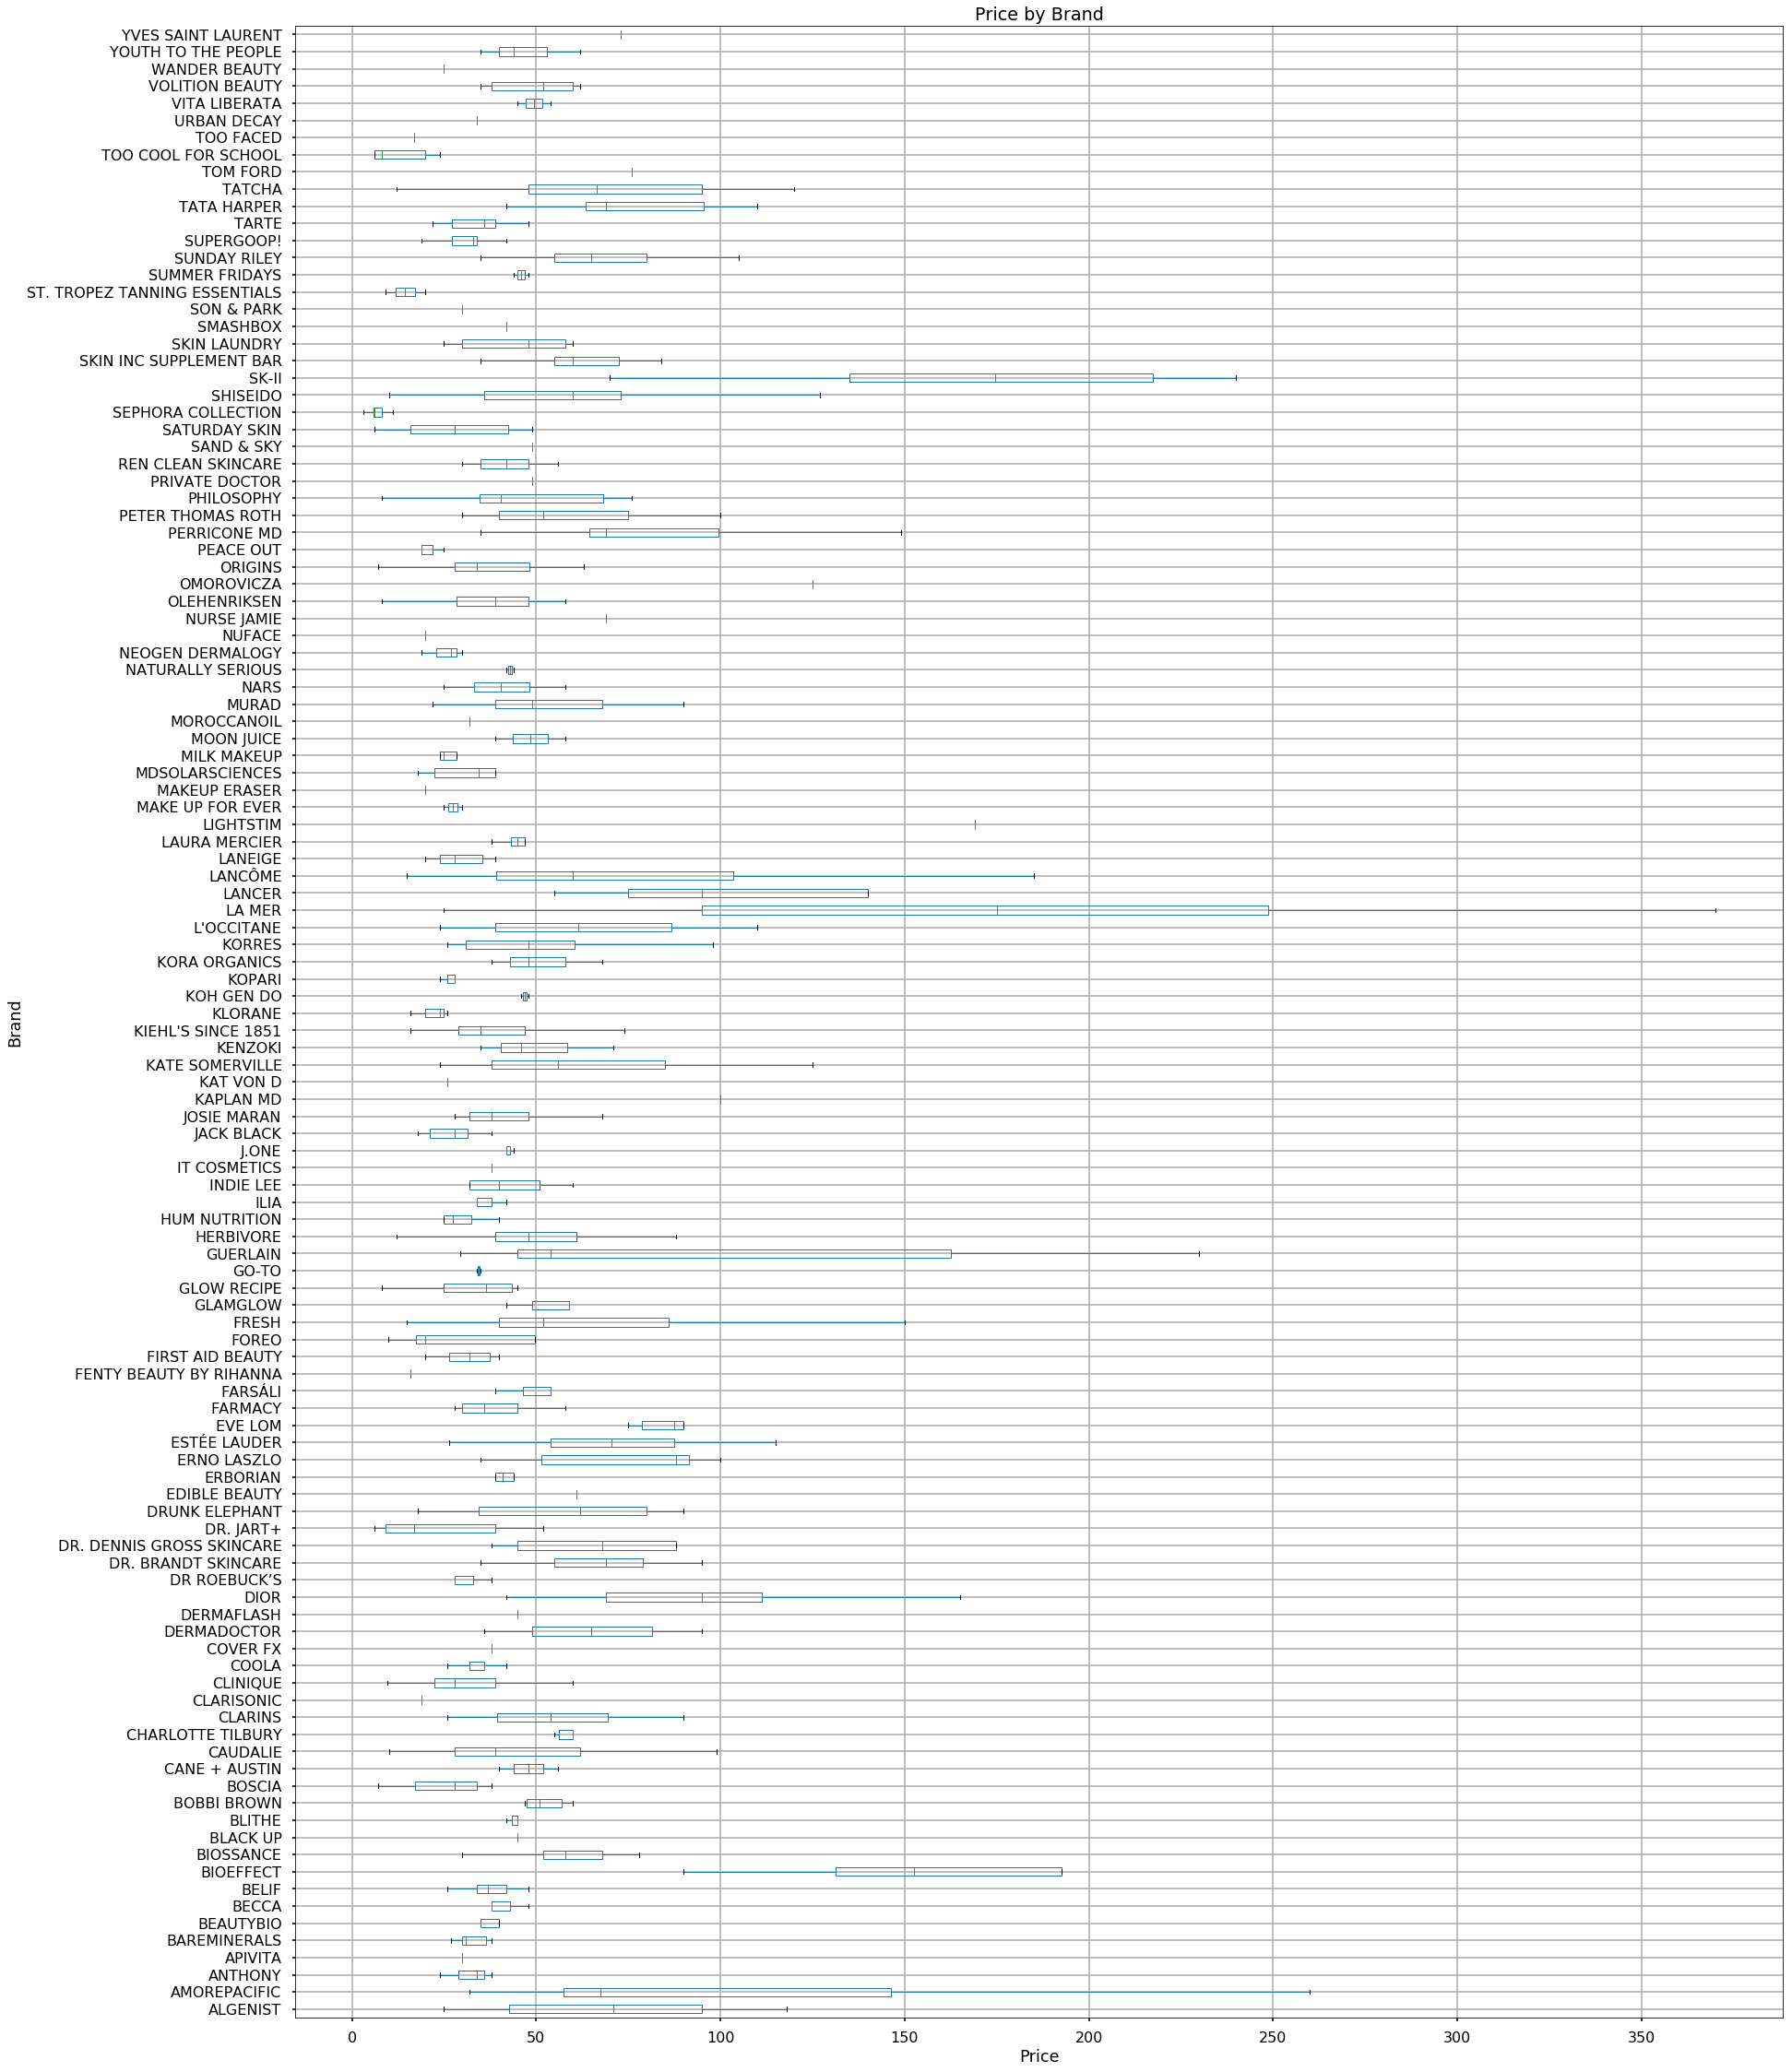

In [6]:
plot=skin.boxplot('price', by='brand', vert=False, figsize = (28,40))
plt.xlabel('Price')
plt.ylabel('Brand')
plt.title('Price by Brand')
plt.suptitle('')
plt.show()

Here are the average ranks of the brands:

In [7]:
skin.groupby(['brand'])['rank'].mean()

brand
ALGENIST               4.023333
AMOREPACIFIC           4.254167
ANTHONY                4.233333
APIVITA                4.000000
BAREMINERALS           4.116667
                         ...   
VITA LIBERATA          3.850000
VOLITION BEAUTY        4.420000
WANDER BEAUTY          4.450000
YOUTH TO THE PEOPLE    4.357143
YVES SAINT LAURENT     3.400000
Name: rank, Length: 116, dtype: float64

Here is a box plot of the average rank by brand. Most of the data is right-skewed by some brands' rankings are more spread out, such as St. Tropez Tanning Essentials and Foreo. St. Tropez had the lowest rank and Foreo had a long tail but still a generally high rank.

/Users/katehofer/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


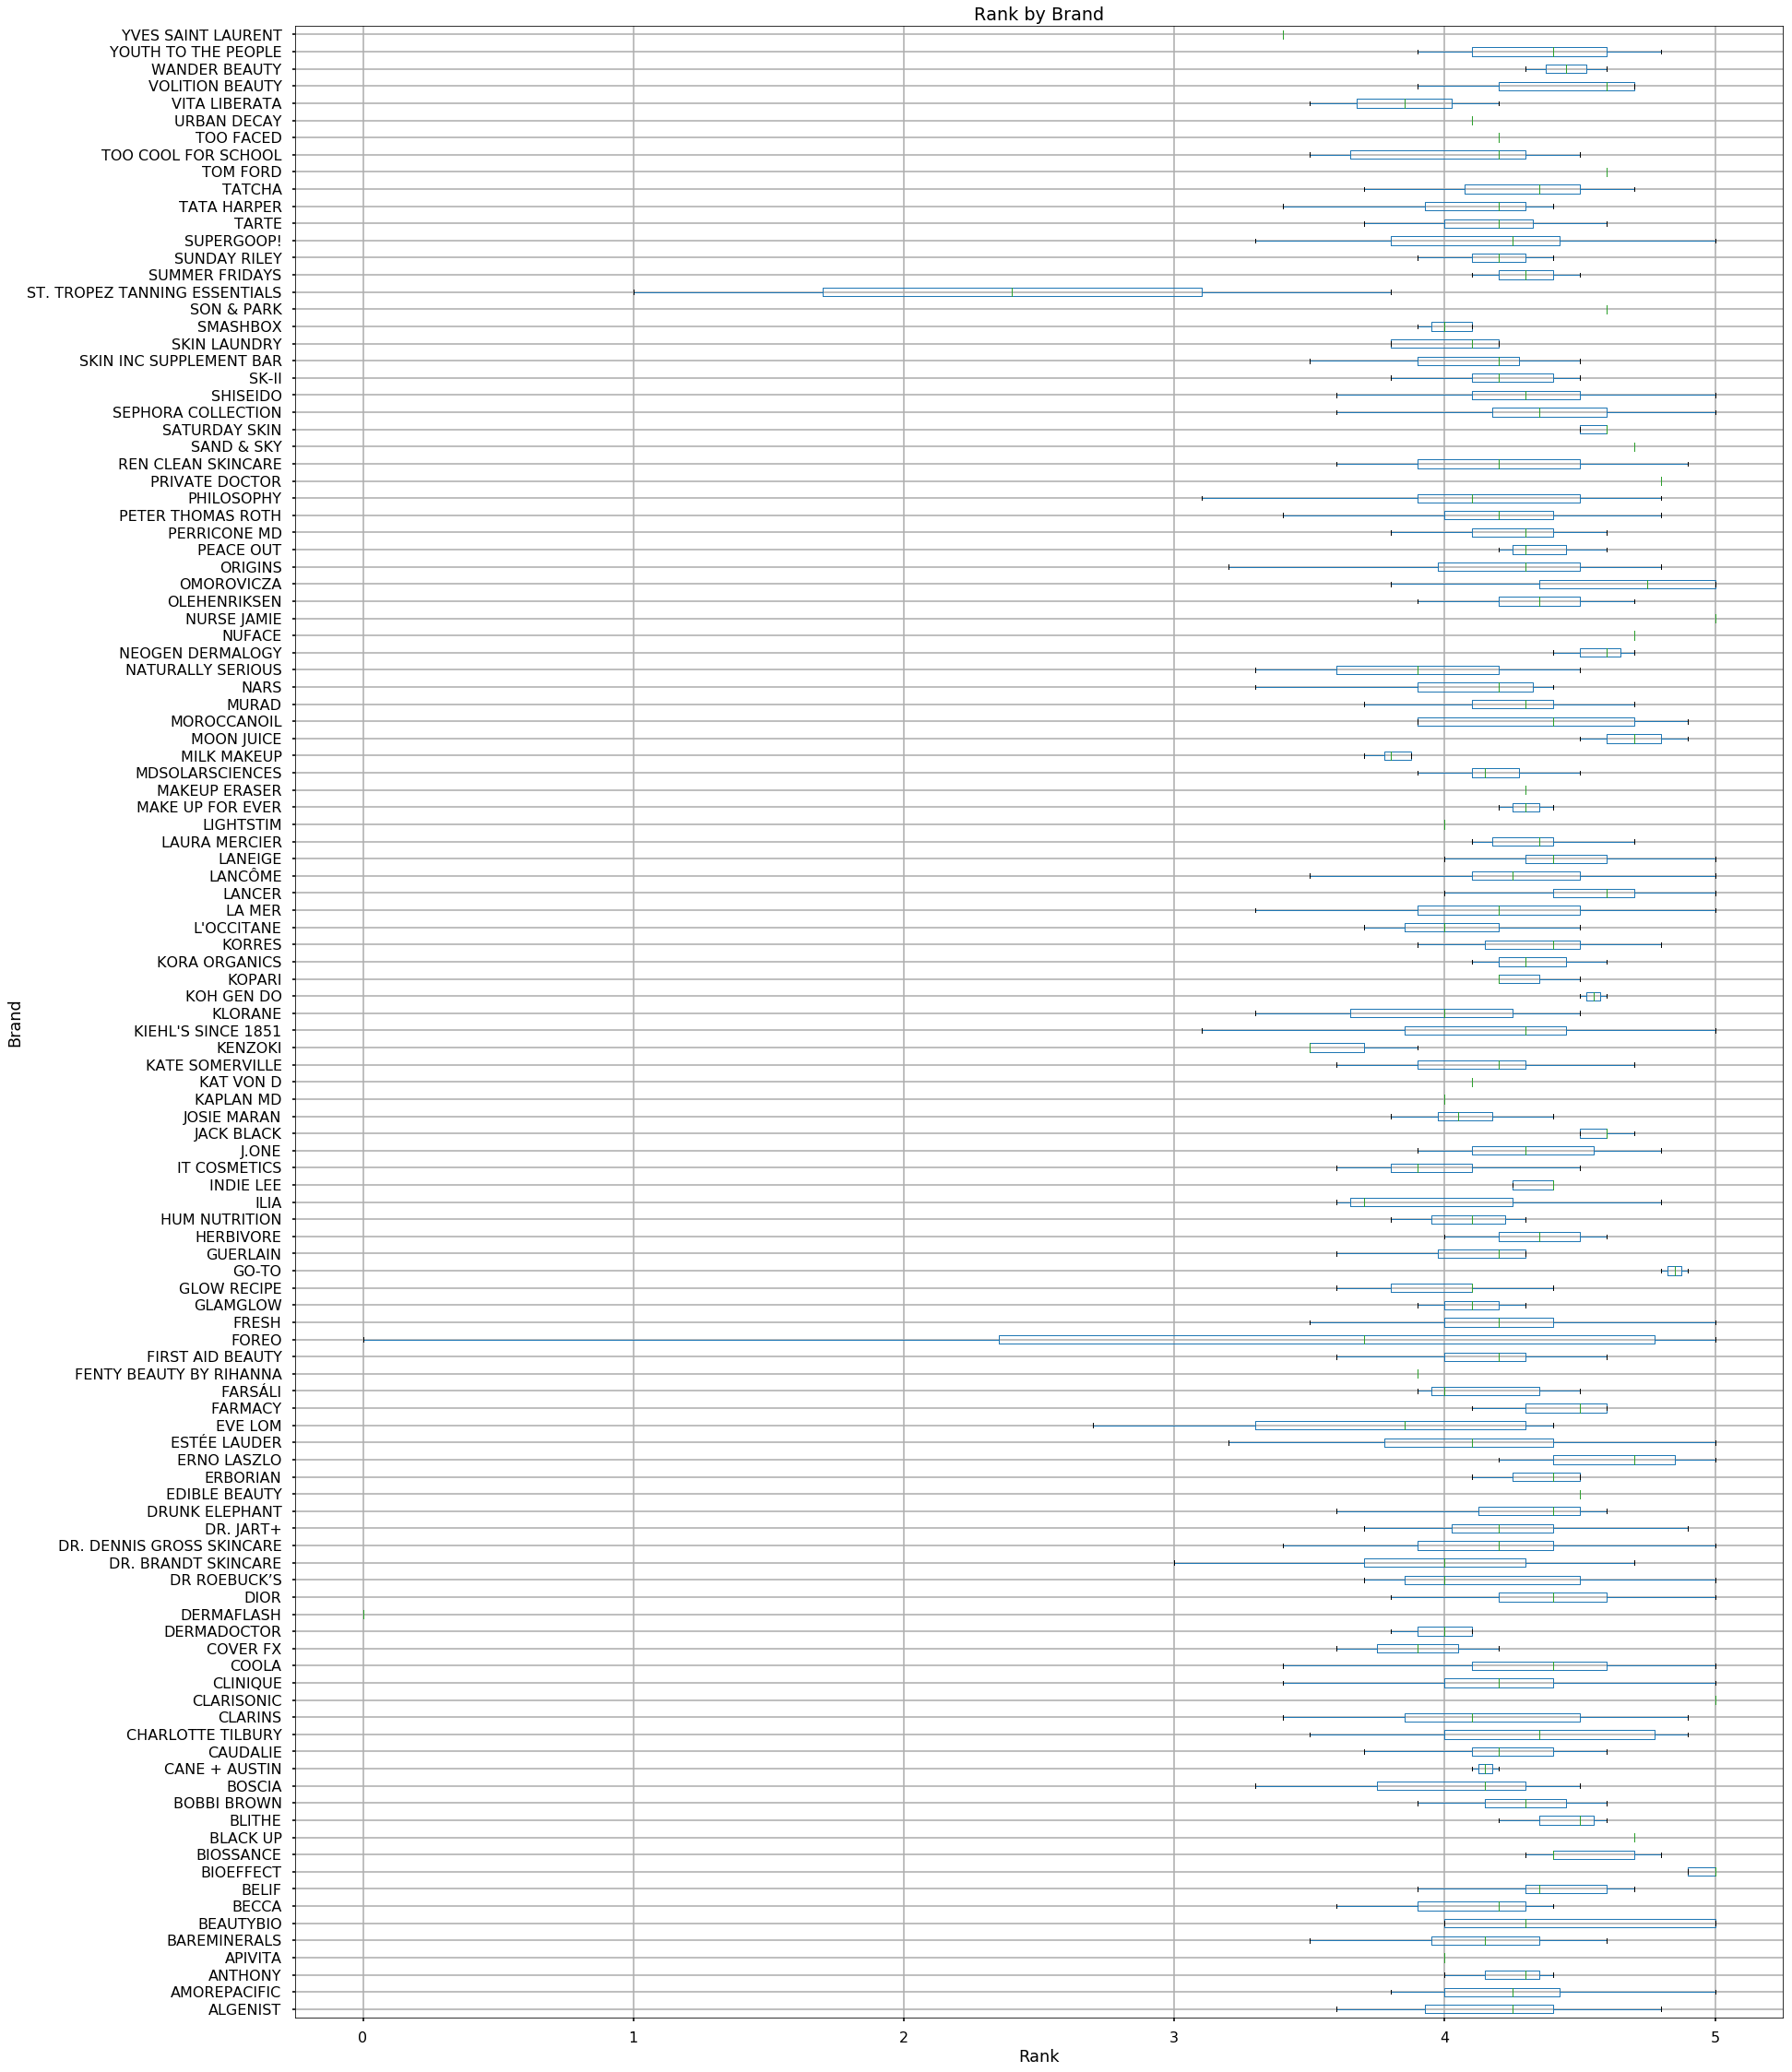

In [8]:
plot=skin.boxplot('rank', by='brand', vert=False, figsize = (28,40))
plt.xlabel('Rank')
plt.ylabel('Brand')
plt.title('Rank by Brand')
plt.suptitle('')
plt.show()

Here are the average rank of different labels:

In [9]:
skin.groupby(['label'])['rank'].mean()

label
cleanser        4.298997
eye             3.817593
face            4.185906
facial          4.217000
moisturizing    4.265772
sunscreen       4.069953
Name: rank, dtype: float64

This is a box plot where we looked at how ranking varies across different labels. The label with the highest median is cleanser, and the label with the lowest median is the eye product. Eye, face, and sunscreen appear to have the largest distributions.

/Users/katehofer/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


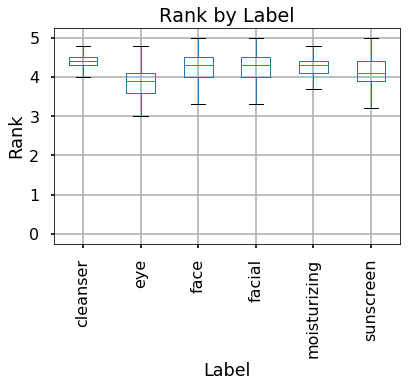

In [10]:
#Rank by Label
skin.boxplot('rank', by='label', rot=90)
plt.xlabel('Label')
plt.ylabel('Rank')
plt.title('Rank by Label')
plt.suptitle('')
plt.show()

Here are the average prices of different labels:

In [11]:
skin.groupby(['label'])['price'].mean()

label
cleanser        34.511706
eye             63.337963
face            43.570268
facial          75.780000
moisturizing    69.548333
sunscreen       47.800469
Name: price, dtype: float64

We created a scatter plot to look at the relationship between ranking and price. Notice how the data is right-skewed. There is a weak correlation between price and rank, showing that prices vary no matter the rank, and that there are generally more rankings above 3.

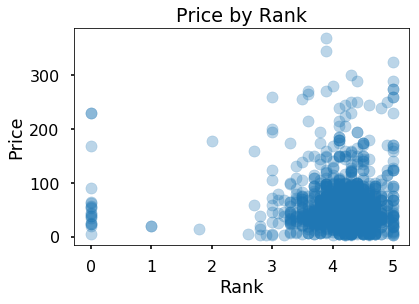

In [12]:
plt.scatter(x=skin['rank'],y=skin["price"], alpha=0.3)
plt.xlabel('Rank')
plt.ylabel('Price')
plt.title('Price by Rank')
plt.show()

****
### Analyses using models:
- Linear Regression
- Train-Test Split
- Logistic Regression

In [13]:
by_eye=skin[skin['label']=='eye'].sort_values(by=['price'])


In [14]:
skin.shape

(1630, 17)

For the purposes of our evaluation, we decided to drop all of the entries that contain a NaN.

In [15]:
skin=skin.dropna()

****
### Pre-Registration Analyses

1. To determine **whether high-end products have differential ratings from drugstore and mid-price items**, we will perform a T-test of the mean ratings between these price points. We will also perform linear regression and possibly k-means clustering, if applicable. For the linear regression, ratings will be the dependent variable and price will be the independent variable.



First, we performed the T test for rank. In this hypothesis test, our null hypothesis is that there is no statistically siginificant difference between the mean rank of low-to-midend products and high-end products. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [16]:
#From the summary of skin df: 75th percentile of price is $68, we will use that as our cutoff for "high-end" products
highend=skin.loc[(skin['price']>=68)]
low_midend=skin.loc[(skin['price']<68)]
print(stats.levene(highend['rank'], low_midend['rank']))

#The small p-value suggests that the populations do not have equal variances.

LeveneResult(statistic=0.2448674658865857, pvalue=0.6207795284289415)


In [17]:
ttest= stats.ttest_ind(highend['rank'], low_midend['rank'], equal_var= True)
print(ttest)

Ttest_indResult(statistic=-0.01340589822471827, pvalue=0.9893056108377003)


From the summary statistics that we found for the skin dataset, the 75th percentile of price is $68, so we used that as our cutoff for what we consider "high-end" products.

The p-value for this test is 0.989. Since our p-value is not smaller than our significant level of 0.05, we fail to reject null hypothesis. In other words, there is no statistically significant difference between the mean rank of low-to-mid-end products and high-end products.

In [18]:
#Linear Regression model regressing rank on price
rankonprice_regression = LinearRegression()
rankonprice_regression.fit(skin[['price']], skin['rank'])
print('Coefficient for the predictor is' , rankonprice_regression.coef_[0])
score=rankonprice_regression.score(skin[['price']], skin['rank'])
print('R squared value for the multiple linear regression is', score)

Coefficient for the predictor is -0.00036444350587649195
R squared value for the multiple linear regression is 0.0006888237357867144


The coefficient value -0.0004 tells us that for every $1 increase in a product's price, the rank of that product decreases by 0.0004 units, ceteris paribus.

In [19]:
#using statsmodels package to see p-value --> https://www.statsmodels.org/devel/example_formulas.html 

mod = smf.ols(formula='rank ~ price', data=skin)

results = mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.117
Date:                Tue, 11 May 2021   Prob (F-statistic):              0.291
Time:                        16:38:36   Log-Likelihood:                -1501.2
No. Observations:                1623   AIC:                             3006.
Df Residuals:                    1621   BIC:                             3017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1832      0.024    171.300      0.0

As we can see from the table, the p-value for this regression is 0.291. This is statistically insignificant at the 5% level.The R-squared value of 0.001 is very low, indicating that price and rank of products are not highly correlated. 

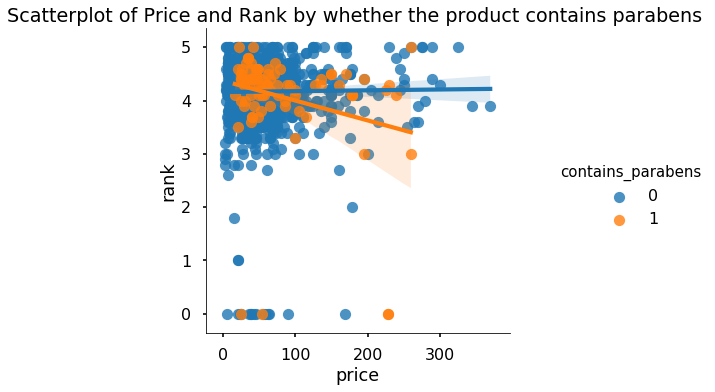

In [20]:
#Scatterplot of price and rank by existence of parabens or not
sns.lmplot(x='price', y='rank', data=skin, hue='contains_parabens')

plt.title('Scatterplot of Price and Rank by whether the product contains parabens ')
plt.show()


The scatterplot shows that there is not a significant distinction between price and rank based on if a product contains parabens or not. The orange points (products containing parabens) appear to overlap with the blue points (products not containing parabens) which further supports this result. The orange line indicating the slope of the relationship between price and rank of products that contain parabens is negative which means that as price increases, rank decreases for products that contain parabens. The blue slope is slightly positive, indicating a positive relationship between price and rank for products that don't contain parabens. This could be because there are more products in our dataset that do not contain paraben than those that do. 

2. Next, **we will examine parabens**. In the ‘ingredients’ column of the datasets, we will index to find all the products that contain parabens such as methylparabens and ethylparabens. We will then perform two linear regressions: one with price as the outcome and a second with rating as the outcome. The predictor variables for these regressions will be a dummy variable indicating if the product contains parabens, price/rating (whichever is not the dependent variable), and skin type dummy variables. 

In [21]:
#linreg price on contains parabens, rating, and skin dummy 
#using statsmodels package to see p-value --> https://www.statsmodels.org/devel/example_formulas.html 


mod = smf.ols(formula='price ~ contains_parabens + rank + normal+  oily + combination + dry + sensitive + full + natural + matte + light + radiant', data=skin)

results = mod.fit()

print('OLS Results with Price as Dependent Variable:' )
print('\n')
print(results.summary())

OLS Results with Price as Dependent Variable:


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     5.162
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.50e-08
Time:                        16:38:39   Log-Likelihood:                -8412.5
No. Observations:                1623   AIC:                         1.685e+04
Df Residuals:                    1610   BIC:                         1.692e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

The coefficient on containing parabens was 26.07 with a p-value of 0. This means that on average, a product that contains parabens has a price \$26.07 greater than a product that does not contain parabens in its ingredient list, ceteris paribus. 

In [22]:
#linreg rank on contains parabens, price, and skin dummy 
#using statsmodels package to see p-value --> https://www.statsmodels.org/devel/example_formulas.html 



mod = smf.ols(formula='rank ~ contains_parabens + price + normal + oily + combination + dry + sensitive + full + natural + matte + light + radiant', data=skin)

results = mod.fit()

print('OLS Results with Rank as Dependent Variable:' )
print('\n')
print(results.summary())

OLS Results with Rank as Dependent Variable:


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.327
Date:                Tue, 11 May 2021   Prob (F-statistic):              0.196
Time:                        16:38:39   Log-Likelihood:                -1493.8
No. Observations:                1623   AIC:                             3014.
Df Residuals:                    1610   BIC:                             3084.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

The coefficient on containing parabens was -0.0794 with a p-value of 0.236. This means that on average, a product that contains parabens has a ranking of 0.0794 units lower than a product that does not contain parabens, ceteris paribus. 

**** 
# Additional Analyses

### Single Variable Linear Regression Model

In this section, we will perform a linear regression analysis to determine whether there is a linear relationship between the price of skincare products and likelihood that a product contains parabens. We will also examine if there is a linear relationship between price and rank (rating).

In [23]:
#Linear Regression model regressing parabens on price
from sklearn.linear_model import LinearRegression
price_regression = LinearRegression()
price_regression.fit(skin[['price']], skin['contains_parabens'])
print('Coefficient for the predictor is' , price_regression.coef_[0])
score=price_regression.score(skin[['price']], skin['contains_parabens'])
print('R squared value for the multiple linear regression is', score)

Coefficient for the predictor is 0.0007077188754015002
R squared value for the multiple linear regression is 0.01847763037412098


In [24]:
#using statsmodels package to see p-value --> https://www.statsmodels.org/devel/example_formulas.html 

mod = smf.ols(formula='contains_parabens ~ price', data=skin)

results = mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      contains_parabens   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     30.52
Date:                Tue, 11 May 2021   Prob (F-statistic):           3.85e-08
Time:                        16:38:39   Log-Likelihood:                 105.53
No. Observations:                1623   AIC:                            -207.1
Df Residuals:                    1621   BIC:                            -196.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0161      0.009      1.779      0.0

The coefficient value 0.0007 tells us that for every $1 increase in a product's price, the probability that the product contains parabens increases by .07%, ceteris paribus. The p-value is 0, which indicates that this result is significant at the 5% level. 

However, the R-squared value is also very low, indicating that there is very weak positive relationship between a products price and the likelihood a product contains parabens. This suggests that linear regression is not a good model for these two variables. This is not surprising, since we are trying to fit a binary dependent variable on a continuous variable.

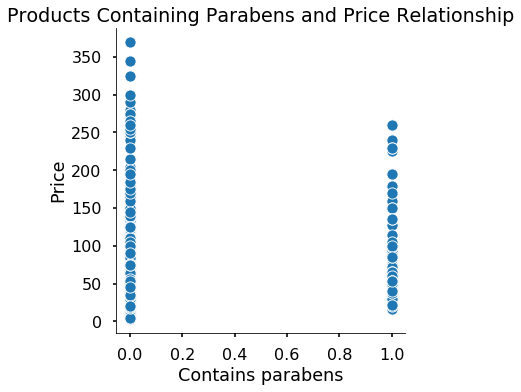

In [25]:
#plot parabens and price relationship
sns.relplot(data=skin, x='contains_parabens', y='price')
plt.title('Products Containing Parabens and Price Relationship')
plt.xlabel('Contains parabens')
plt.ylabel('Price')
plt.show()

This plot looks at the relationship between a product's price and whether that product contains parabens. As we can see, there doesn't appear to be any significant differences in prices between products that contain parabens and products that don't contain parabens. The range of prices for products that do not contain parabens is larger than the range of prices for products that do contain parabens; however, there are not any clear price distinctions that we can see. 

### Multivariable Linear Regression Model

In the following cells we build a multivariable linear regression model with price and labels as predictors and rank as the outcome.

In [26]:
dummies=pd.get_dummies(skin['label'])
skin=skin.copy()
skin['eye']=dummies['eye']
skin['moisturizing']=dummies['moisturizing']
skin['sunscreen']=dummies['sunscreen']
skin['cleanser']=dummies['cleanser']
skin['facial']=dummies['facial']
skin['face']=dummies['face']

In order to perform a multivariable linear regression, we first created dummy variables for all of the product labels. We then fit the linear regression using rank as the outcome and the labels and price as the predictors.

Estimated coefficients for this model for price, eye, moisturizing, sunscreen, cleanser, facial and face respectively are [-1.78153027e-04 -3.23645229e-01  1.25949394e-01 -7.40528217e-02
  1.52623349e-01  7.79787648e-02  4.11465439e-02]


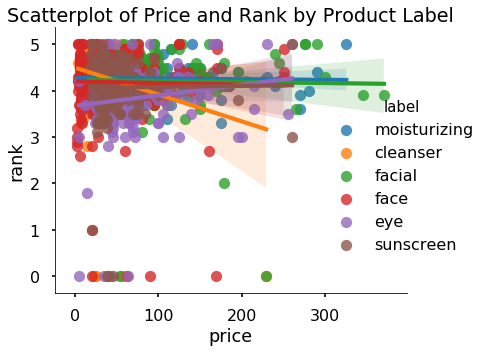

In [27]:
#linear regression with price and labels as predictors and rank as outcome
sns.lmplot(x='price', y='rank', data=skin, hue='label')

model2 = LinearRegression()
model2.fit(skin[['price', 'eye', 'moisturizing', 'sunscreen', 'cleanser', 'facial', 'face']],skin['rank'])
print('Estimated coefficients for this model for price, eye, moisturizing, sunscreen, cleanser, facial and face respectively are', model2.coef_)
plt.title('Scatterplot of Price and Rank by Product Label')
plt.tight_layout()

As we can see from the plot and the coefficient values, there is not a strong linear relationship between rank and any of our predictor variables. One thing to note is that the orange line (cleanser products) and the purple line (eye products) appear to have different relationships between price and rank than the other predictors. It appears that rank and price of cleanser products have a negative relationship whereas the rank and price of eye products have a slightly positive relationship.

While we had previously planned to perform K-means clustering using labels, we can see from this plot that this would not be a suitable model.

#### Multivariable linear regression with skin type as predictors and parabens as outcome

In [55]:
#LPM: Regress Parabens on Skin-types
mod = smf.ols(formula='contains_parabens ~ normal+  oily + combination + dry + sensitive + full + natural + matte + light + radiant', data=skin)

results = mod.fit()

print('OLS Results: Regress Parabens on Skin-types' )
print('\n')
print(results.summary())

OLS Results: Regress Parabens on Skin-types


                            OLS Regression Results                            
Dep. Variable:      contains_parabens   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9236
Date:                Tue, 11 May 2021   Prob (F-statistic):              0.510
Time:                        16:39:18   Log-Likelihood:                 95.033
No. Observations:                1623   AIC:                            -168.1
Df Residuals:                    1612   BIC:                            -108.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Inte

As seen by the large p-values, there are no statistically significant skin-types that predict whether a product has parabens or not. 

#### Multivariable linear regression with labels as predictors and parabens as outcome

In [56]:
#LPM: Regress Parabens on product labels
#took face out to avoid multicollinearity
mod = smf.ols(formula='contains_parabens ~ eye + moisturizing + sunscreen + cleanser + facial ', data=skin)

results = mod.fit()

print('OLS Results: Regress Parabens on Product Labels' )
print('\n')
print(results.summary())

OLS Results: Regress Parabens on Product Labels


                            OLS Regression Results                            
Dep. Variable:      contains_parabens   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.051
Date:                Tue, 11 May 2021   Prob (F-statistic):             0.0689
Time:                        16:39:18   Log-Likelihood:                 95.527
No. Observations:                1623   AIC:                            -179.1
Df Residuals:                    1617   BIC:                            -146.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

All product-labels products, on average, have a greater likelihood of containing parabens relative to the face-label category. These are all statistically significant at the .05 level, with the exception of eye products. 

#### Multivariable linear regression with skin-types as predictors and rank as outcome

In [107]:
# Regress price on Skin-types
mod = smf.ols(formula='rank ~ normal+  oily + combination + dry + sensitive + full + natural + matte + light + radiant', data=skin)

results = mod.fit()

print('OLS Results: Regress Rank on Skin-types' )
print('\n')
print(results.summary())

OLS Results: Regress Rank on Skin-types


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.283
Date:                Tue, 11 May 2021   Prob (F-statistic):              0.235
Time:                        17:16:06   Log-Likelihood:                -1495.3
No. Observations:                1623   AIC:                             3013.
Df Residuals:                    1612   BIC:                             3072.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercep

On average, skin products for normal skin have a 0.258 unit higher ranking than products that are not for normal skin. With a p-value of .009, this is a statistically significant finding. 

#### Multivariable linear regression with skin-types as predictors and price as outcome

In [60]:
# Regress price on Skin-types
mod = smf.ols(formula='price ~ normal+  oily + combination + dry + sensitive + full + natural + matte + light + radiant', data=skin)

results = mod.fit()

print('OLS Results: Regress Price on Skin-types' )
print('\n')
print(results.summary())

OLS Results: Regress Price on Skin-types


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.909
Date:                Tue, 11 May 2021   Prob (F-statistic):            0.00129
Time:                        16:39:19   Log-Likelihood:                -8428.6
No. Observations:                1623   AIC:                         1.688e+04
Df Residuals:                    1612   BIC:                         1.694e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Interce

On average, skin products for normal skin have a \$18.05 higher prices than products that are not for normal skin. With a p-value of .011, this is a statistically significant finding.

On average, skin products for combination skin have a \$18.61 lower prices than products that are not for combination skin. With a p-value of .010, this is a statistically significant finding.

On average, skin products for dry skin have a \$13.34 higher prices than products that are not for dry skin. With a p-value of .006, this is a statistically significant finding.

On average, skin products for sensitive skin have a \$6.54 lower prices than products that are not for sensitive skin. With a p-value of .041, this is a statistically significant finding.


## Linear regression with price as outcome and labels and rank as predictors

In [61]:
#price on label and rank
#took face label out to avoid multicolliearity
mod = smf.ols(formula='price ~ rank + eye + moisturizing + sunscreen + cleanser + facial ', data=skin)

results = mod.fit()

print('OLS Results: Regress Price on Rank and Product Labels' )
print('\n')
print(results.summary())

OLS Results: Regress Price on Rank and Product Labels


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     36.18
Date:                Tue, 11 May 2021   Prob (F-statistic):           2.78e-41
Time:                        16:39:19   Log-Likelihood:                -8340.8
No. Observations:                1623   AIC:                         1.670e+04
Df Residuals:                    1616   BIC:                         1.673e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

On average, eye products, moisturizers, and facial product have a \\$19.45, \\$24.65, and \\$32.24 higher prices relative to face product prices, repectively. These are all a statistically significant findings with p-values equal to 0.

On average, cleansers have a $8.96 lower price relative to face product prices. With a p-value of .008, this result is statistically significant. 


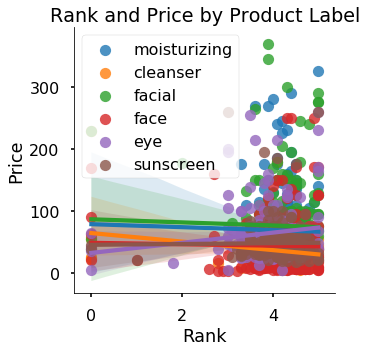

In [62]:
#plot x= rank y= price by label
sns.lmplot(x='rank', y='price', data=skin, hue='label', legend_out=False)
plt.title ('Rank and Price by Product Label')
plt.xlabel('Rank')
plt.ylabel('Price')
plt.tight_layout()
plt.legend(loc='best')

plt.show()

As you can see, this also does not look that pretty. It'd be better to at least keep the price as the predictor and rank as the outcome

## Train-Test Split Evaluation

#### In this section, we split the data into train and test sets and evaluate the performance of our training set. 

Train-Test Split for predicting whether a product contains parabens, given the price

In [28]:
x_train, x_test = train_test_split(skin, test_size=0.2, random_state=15)
print('Training set')
print(x_train.head())
print('\n')
print('Test set')
print(x_test.head())

Training set
             label          brand  \
147   moisturizing        LANEIGE   
1070          face          J.ONE   
1273           eye  EDIBLE BEAUTY   
1471     sunscreen        LANCÔME   
60    moisturizing   OLEHENRIKSEN   

                                                   name  price  rank  \
147                            Water Bank Hydrating Gel   35.0   4.6   
1070                                   Black Jelly Pack   44.0   4.8   
1273                                 Gold Rush Eye Balm   61.0   4.5   
1471  Rénergie Lift Multi-Action Sunscreen Broad Spe...   99.0   3.9   
60                        C-Rush™ Brightening Gel Crème   44.0   4.6   

                                            ingredients  normal  oily  \
147   -Hydro Ionized Mineral Water: Formulated with ...       1     1   
1070  -Red Wine Extract: Increases skin’s natural ce...       1     1   
1273  -Gold Leaf: Pure, edible gold imparts radiance...       1     1   
1471  -Avobenzone 3%\n-Octisalate 5%\n-

In [29]:
lregression = LogisticRegression().fit(x_train[['price']], x_train['contains_parabens'])
print('Logistic Regression Coefficient is ', lregression.coef_[0][0])
y_pred = lregression.predict(x_test[['price']])
b=np.sum(y_pred==x_test['contains_parabens'])/len(y_pred)
answer=(b*100).round(1)
print('Prediction accuracy of this model is',answer,'%')

Logistic Regression Coefficient is  0.007843680675792296
Prediction accuracy of this model is 92.9 %


In other words, the model will predict whether a product contains parabens based on the price of the product 92.9% of the time. Although this is a very high accuracy, we must keep in mind that a small proportion of our products actually contain parabens. This might mean that there is not a sufficient number of records with parabens, and therefore there is not actually enough data in the test set to properly evaluate the model performance. In terms of the bigger picture, both our train and test datasets are most likely not suitable representations of the problem domain.

### Train-Test Split for predicting whether a product contains parabens, given the rank

In [30]:
x_train2, x_test2 = train_test_split(skin, test_size=0.8)
print('Training set')
print(x_train2.head())
print('\n')
print('Test set')
print(x_test2.head())

Training set
             label      brand  \
250   moisturizing    LANCÔME   
1535     sunscreen  BIOSSANCE   
1212           eye   SHISEIDO   
49    moisturizing   CAUDALIE   
963           face      SK-II   

                                                   name  price  rank  \
250   Rénergie Lift Multi-Action Sunscreen Broad Spe...   99.0   3.9   
1535                          Squalane + Mineral SPF 45   39.0   3.7   
1212  Benefiance WrinkleResist24 Pure Retinol Expres...   65.0   4.4   
49                                        Beauty Elixir   18.0   4.3   
963                       Brightening Derm Revival Mask  170.0   4.5   

                                            ingredients  normal  oily  \
250   -Avobenzone 3%\n-Octisalate 5%\n-Octocrylene 7...       1     1   
1535  -Zinc and Titanium Dioxide: Provide mineral-de...       1     1   
1212  -Pure Retinol Micro-infusion Technology: Visib...       1     1   
49    -Mint and Balm Mint Essential Oil: Provide ast...       1

In [31]:
logfit= LogisticRegression().fit(x_train2[['rank']], x_train2['contains_parabens'])
print('Logistic Regression Coefficient is ', logfit.coef_[0][0])
testscore = logfit.score(x_test2[['rank']],x_test2['contains_parabens'])
print('Prediction accuracy of the model is: {:.1%}'.format(testscore))


Logistic Regression Coefficient is  -0.6316233493637158
Prediction accuracy of the model is: 93.9%


Here, we see another high prediction accuracy. The model will predict whether a product contains parabens based on the rank of the product 93.9% of the time. To understand this high number, we can apply the same explanation as we did above with price as the predictor variable. 

# Logistic Regression

In this section, we will be using logistic regression to predict the probability of a product containing parabens, given its rank or price. First, we will fit the logistic regression model.

In [32]:
skin_model = LogisticRegression().fit(skin[['price']], skin['contains_parabens'])
print('Coefficient: ', skin_model.coef_[0][0])
print('Intercept: ', skin_model.intercept_[0])

Coefficient:  0.008630366262349908
Intercept:  -3.3945203168901075


For every \$1 increase in a product's price, the log-odds that the product contains parabens increases by 0.0086, ceteris paribus.

We then need to define a function that will calculate logit

In [33]:
def logit(x):
    return np.exp(x) / (np.exp(x) + 1)

In [34]:
m = skin_model.coef_[0][0]
b = skin_model.intercept_[0]
price = 80
x = m * price + b
print('Probability that a product that costs $80 contains parabens is:', logit(x))

price = 81
x = m * price + b
print('Probability that a product that costs $81 contains parabens is:', logit(x))

Probability that a product that costs $80 contains parabens is: 0.06273238572969846
Probability that a product that costs $81 contains parabens is: 0.06324174471104467


As the price increases, the probability that the product will contain parabens also increases.

Lets now use our function to predict the probability of a product containing parabens, given each rank.

In [35]:
skin_model_rank = LogisticRegression().fit(skin[['rank']], skin['contains_parabens'])
print('Coefficient: ', skin_model_rank.coef_[0][0])
print('Intercept: ', skin_model.intercept_[0])
m = skin_model_rank.coef_[0][0]
b = skin_model_rank.intercept_[0]
rank = 1
x = m * rank + b
print('Probability of a product with rank 1 containing parabens:', logit(x))

rank2 = 2
x = m * rank2 + b
print('Probability of a product with rank 2 containing parabens:', logit(x))

rank3 = 3
x = m * rank3 + b
print('Probability of a product with rank 3 containing parabens:', logit(x))

rank4 = 4
x = m * rank4 + b
print('Probability of a product with rank 4 containing parabens:', logit(x))

rank5 = 5
x = m * rank5 + b
print('Probability of a product with rank 5 containing parabens:', logit(x))

Coefficient:  -0.1998586361975218
Intercept:  -3.3945203168901075
Probability of a product with rank 1 containing parabens: 0.09880969004797735
Probability of a product with rank 2 containing parabens: 0.08238463079688967
Probability of a product with rank 3 containing parabens: 0.06848241626791822
Probability of a product with rank 4 containing parabens: 0.056781002309867615
Probability of a product with rank 5 containing parabens: 0.046978145855899406


As the rank increases, the probability that the product will contain parabens decreases. 

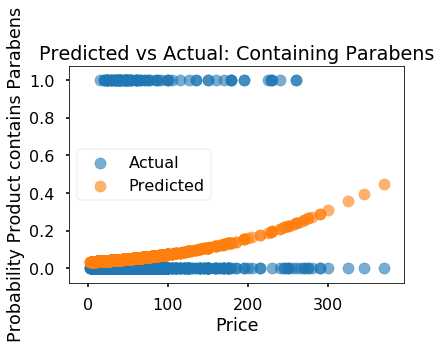

In [97]:
# plot
#  data
plt.scatter(
    skin.price, 
    skin.contains_parabens, 
    alpha = 0.6,
    label='Actual'
)

#  logit probability of class 1
plt.scatter(
    skin.price, 
    skin_model.predict_proba(skin[['price']])[:,1], 
    alpha = 0.6,
    label='Predicted'
)
plt.xlabel('Price')
plt.ylabel('Probability Product contains Parabens')
plt.title('Predicted vs Actual: Containing Parabens')
plt.legend()
plt.show()

This logistic plot shows only the beginning of a sigmoid curve; if we had more high-end products, we would expect to see a continuation of the curve. 

#### Multivariable Logistic Regression with parabens as outcome and skin types as predictors

In [57]:
model5 = LogisticRegression()
model5.fit(skin[['normal','oily','combination','dry','sensitive','full','natural','matte','light','radiant']],
           skin['contains_parabens'])
print('Coefficients for normal, oily, combination, dry, sensitive, full, natural, matte, light, and radiant skin, repectively: ', model5.coef_)

Coefficients for normal, oily, combination, dry, sensitive, full, natural, matte, light, and radiant skin, repectively:  [[-0.21389008 -0.0305736  -0.39170205  0.0878006  -0.08133785 -0.18972144
  -0.14797195 -0.2185382  -0.28793719 -0.12098019]]


#### Multivariable Logistic Regression with parabens as outcome and labels as predictors

In [58]:
#logistic regression with parabens as outcome and labels as predictors
model6 = LogisticRegression()
model6.fit(skin[['eye', 'moisturizing', 'sunscreen', 'cleanser', 'facial', 'face']], skin['contains_parabens'])
print('Coefficients for eye, moisturizing, sunscreen, cleanser, facial, and face products, respectively: ', model6.coef_)


Coefficients for eye, moisturizing, sunscreen, cleanser, facial, and face products, respectively:  [[ 0.05311316  0.08420394  0.14575873  0.38776383  0.18663338 -0.85741708]]


******
## Evaluation of Significance: T-Test (difference in means by parabens)

#### In this section, we performed a T-Test for the difference in means between the prices and the rank of the products with and without parabens. 

### 1. Price

##### First, we performed the T test for price. In this hypothesis test, our null hypothesis is that there is no statistically siginificant difference between the price of products with parabens and the price of products without parabens. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [37]:
subset1=skin.loc[(skin['contains_parabens']==0)]
subset2=skin.loc[(skin['contains_parabens']==1)]
print(stats.levene(subset1['price'], subset2['price']))


LeveneResult(statistic=20.247272112116026, pvalue=7.2897135361557e-06)


The Independent Samples T-Test requires the assumption of homogeneity of variance, so we conducted a Levene test to check for this condition. A small p-value suggests that the populations do not have equal variances. We do this step for each of our following t-tests. 

In this Levene test above, since the p-value is smaller than the significance level of 0.05, this means that the two subsets do NOT have equal variance and we will set the argument `equal_var` to False for the subsequent t-test.

In [38]:
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= False)
print(ttest)

Ttest_indResult(statistic=-3.8165051437310265, pvalue=0.0002429202554311216)


The p value for this test is 0.0002429. Since our p-value is  less than our significant level of 0.05, we reject null hypoethesis and accept the alternative hypothesis. In other words, there is a statistically significant difference between the mean price of products with and without parabens.

### Bootstrap resampling

In order to get an even better sense of whether there is truly a significant difference in the rank and price of products with and without parabens, we decided to do a bootstrap resampling and recalculate the P value using our new sample. Here, we will resample our data with replacement 10000 times to get a sense of what our data might have looked like if we looked at a wider range of similar products.

In [39]:
skin.sample(n=len(skin), replace=True)
bootstraps = 10000
for i in range(bootstraps):
    resampled= skin.sample(n=len(skin), replace=True)

subset_rank_resample=resampled.loc[(resampled['contains_parabens']==0)]
subset_rank2_resample=resampled.loc[(resampled['contains_parabens']==1)]
#Recall that the Independent Samples t Test requires the assumption of homogeneity of variance 
#The small p-value suggests that the populations do not have equal variances.
print(stats.levene(subset_rank_resample['price'], subset_rank2_resample['price']))
ttest= stats.ttest_ind(subset_rank_resample['price'], subset_rank2_resample['price'], equal_var= False)
print(ttest)

LeveneResult(statistic=26.72722402723476, pvalue=2.6338654189068906e-07)
Ttest_indResult(statistic=-3.372948057546707, pvalue=0.0011162607342189584)


In this bootstraped resampling, the P value is also below the critical 0.05 value. We therefore again can reject the null hypothesis in favor of the alternative hypothesis. There is strong evidence that there is a statistically significant difference between the mean price of products containing parabens and. the mean price of products without parabens.

### 2. Rank

##### We will now perform the same hypothesis test for rank. The null hypothesis is that there is no statistically siginificant difference between the rank of products with parabens and the rank of products without parabens. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [40]:
subset_rank=skin.loc[(skin['contains_parabens']==0)]
subset_rank2=skin.loc[(skin['contains_parabens']==1)]
#Recall that the Independent Samples t Test requires the assumption of homogeneity of variance 
#The small p-value suggests that the populations do not have equal variances.
print(stats.levene(subset_rank['rank'], subset_rank2['rank']))

LeveneResult(statistic=4.3749215721298045, pvalue=0.03662679873451586)


Since our levene result has a small P value of 0.0366 this means that the two subsets do not have equal variance.

In [41]:
ttest= stats.ttest_ind(subset_rank['rank'], subset_rank2['rank'], equal_var= False)
print(ttest)

Ttest_indResult(statistic=0.9388533999785962, pvalue=0.3502406816626956)


The p value for this test is 0.350. Since our P value is not smaller than our significant level of 0.05, we fail to reject null hypoethesis. In other words, there is no statistically significant difference between the mean rank of products with and without parabens.

## T-Test for rank using bootstrapped sample

Just like we did with price, we will now resample the data again using the bootstrap resampling method and run the hypothesis test again. The null and alternative hypotheses are the same.

In [42]:
skin.sample(n=len(skin), replace=True)
bootstraps = 10000
for i in range(bootstraps):
    resampled= skin.sample(n=len(skin), replace=True)

subset_rank_resample=resampled.loc[(resampled['contains_parabens']==0)]
subset_rank2_resample=resampled.loc[(resampled['contains_parabens']==1)]
#Recall that the Independent Samples t Test requires the assumption of homogeneity of variance 
#The small p-value suggests that the populations do not have equal variances.
print(stats.levene(subset_rank_resample['rank'], subset_rank2_resample['rank']))
ttest= stats.ttest_ind(subset_rank_resample['rank'], subset_rank2_resample['rank'], equal_var= False)
print(ttest)

LeveneResult(statistic=13.161636571919509, pvalue=0.00029459493166515)
Ttest_indResult(statistic=1.1370491953119803, pvalue=0.25835309242291077)


Same conclusion, with a large p-value of 0.258 that's greater than .05, we fail to reject the null hypothesis. There is no statistical difference in rank of products with and without parabens.

**We reject the null hypothesis for the difference in prices between products with and without parabens. We can therefore say that there appears to be evidence for a difference in price between skin care products with and without parabens. But for which types of products is this difference in price most significant? We therefore decided to subset our data and perform the hypothesis test on each label catagory, to see whether there is a significant difference in price.**

## T-Test for statistically significant difference in price between products that contain parabens and products that don't contain paraben (grouped by label)

### 1. Eye products

#####  In this hypothesis test, our null hypothesis is that there is no statistically siginificant difference between the price of eye products with parabens and the price of products without parabens. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [98]:
by_eye.groupby(['contains_parabens'])['price'].mean()

contains_parabens
0    62.887255
1    71.000000
Name: price, dtype: float64

In [105]:
subset1=by_eye.loc[(by_eye['contains_parabens']==0)].dropna()
subset2=by_eye.loc[(by_eye['contains_parabens']==1)].dropna()

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= True)
print(ttest)

LeveneResult(statistic=0.49946458470163035, pvalue=0.4805042657940849)
Ttest_indResult(statistic=-0.6568216496864048, pvalue=0.5120013181851291)


The p-value for this t-test is 0.512. Since our p-value is not less than our significant level of 0.05, we fail to reject null hypoethesis. In other words, there is no statistically significant difference between the mean price of eye products with and without parabens.

### 2. Moisturizing Products

#####  In this hypothesis test, our null hypothesis is that there is no statistically siginificant difference between the price of moisturizing products with parabens and the price of products without parabens. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [45]:
#parabens by label = moisturizing
moisturizing = skin[skin['label']=='moisturizing'].sort_values(by=['price'])
moisturizing.groupby(['contains_parabens'])['price'].mean()

contains_parabens
0     65.225000
1    116.323529
Name: price, dtype: float64

In [46]:
subset1=moisturizing.loc[(moisturizing['contains_parabens']==0)]
subset2=moisturizing.loc[(moisturizing['contains_parabens']==1)]

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= False)
print(ttest)

LeveneResult(statistic=8.344769411104862, pvalue=0.0041545052621483015)
Ttest_indResult(statistic=-2.9400491634468735, pvalue=0.009214265813776741)


The p value for this t-test is 0.0092. Since our P value is less than our significant level of 0.05, we reject null hypoethesis and accept the alternative hypothesis. In other words, there is statistically significant difference between the mean price of moisturizing products with and without parabens.

### 3. Facial products

#####  In this next hypothesis test, our null hypothesis is that there is no statistically siginificant difference between the price of facial products with parabens and the price of products without parabens. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [47]:
#facial
facial = skin[skin['label']=='facial'].sort_values(by=['price'])
facial.groupby(['contains_parabens'])['price'].mean()

contains_parabens
0    75.419929
1    81.105263
Name: price, dtype: float64

In [48]:
subset1=facial.loc[(facial['contains_parabens']==0)]
subset2=facial.loc[(facial['contains_parabens']==1)]

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= True)
print(ttest)

#facial within label is NOT significant for parabens and price

LeveneResult(statistic=0.3985481367304362, pvalue=0.5283239413447972)
Ttest_indResult(statistic=-0.45318306112280005, pvalue=0.650746725103712)


The p value for this t-test is 0.65. Since our P value is not less than our significant level of 0.05, we fail to reject null hypoethesis. There is not a statistically significant difference between the mean price of facial products with and without parabens.

### 4. Face Products

#####  In this next hypothesis test, our null hypothesis is that there is no statistically siginificant difference between the price of face products with parabens and the price of products without parabens. Our alternative hypothesis is that there is a statistically significant difference between the prices of these two groups of products. We will then carry out the T test, assuming that the null hypothesis is true. We will be using a significant level of 0.05.

In [49]:
#face
face = skin[skin['label']=='face'].sort_values(by=['price'])
face.groupby(['contains_parabens'])['price'].mean()

contains_parabens
0    42.530616
1    94.166667
Name: price, dtype: float64

In [50]:
subset1=face.loc[(face['contains_parabens']==0)]
subset2=face.loc[(face['contains_parabens']==1)]

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= True)
print(ttest)

#face within label is significant for parabens and price 

LeveneResult(statistic=1.9186606028475492, pvalue=0.16704737694805546)
Ttest_indResult(statistic=-3.2174216349369, pvalue=0.0014369371683882598)


The p value for this t-test is 0.0014. Since our P value is  less than our significant level of 0.05, we reject null hypoethesis and accept the alternative hypothesis. There is a statistically significant difference between the mean price of face products with and without parabens.

### 5. Cleanser products

In [51]:
#cleanser
cleanser = skin[skin['label']=='cleanser'].sort_values(by=['price'])
cleanser.groupby(['contains_parabens'])['price'].mean()

contains_parabens
0    32.936594
1    53.413043
Name: price, dtype: float64

In [52]:
subset1=cleanser.loc[(cleanser['contains_parabens']==0)]
subset2=cleanser.loc[(cleanser['contains_parabens']==1)]

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= False)
print(ttest)

#cleanser within label is significant for parabens and price

LeveneResult(statistic=10.800194015457766, pvalue=0.0011365998895944938)
Ttest_indResult(statistic=-1.921141764644511, pvalue=0.06747543125950599)


The p value for this t-test is 0.067. Since our P value is not less than our significant level of 0.05, we fail to reject null hypoethesis. There is not a statistically significant difference between the mean price of cleanser products with and without parabens.

### 6. Sunscreen products

In [53]:
#sunscreen
sunscreen = skin[skin['label']=='sunscreen'].sort_values(by=['price'])
sunscreen.groupby(['contains_parabens'])['price'].mean()

contains_parabens
0    45.637500
1    81.076923
Name: price, dtype: float64

In [54]:
subset1=sunscreen.loc[(sunscreen['contains_parabens']==0)]
subset2=sunscreen.loc[(sunscreen['contains_parabens']==1)]

print(stats.levene(subset1['price'], subset2['price']))
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= False)
print(ttest)

#sunscreen within label is significant for parabens and price

LeveneResult(statistic=13.464037707246119, pvalue=0.00030798882708884314)
Ttest_indResult(statistic=-1.578057620875347, pvalue=0.14024803532395327)


The p value for this t-test is 0.140. Since our P value is not less than our significant level of 0.05, we fail to reject null hypoethesis. There is not a statistically significant difference between the mean price of sunscreen products with and without parabens.

### Summary of Evaluation

According to the 6 t-tests above, here is a summary of our findings.

**Statistically Significant Difference in Price**: 
- Moisturizing
- Face

**Not Statistically Significant**:
- Facial
- Sunscreen
- Cleanser
- Eye

## Limitations of hypothesis tests: Type I and Type II Errors

One limitation that we must be mindful of is the existence of type I and type II errors. For the instances where we rejected the null hypothesis in favor of the alternative hypothesis, there is a 5% chance that we may have a type I error. A type I error is where there is a false positive; in other words we reject the null hypothesis when we should not have. One way we could  reduce  the possibility of this error is by increasing the sample size. A type II error is where there is a false negative; in other words we fail to reject the null hypothesis when we should have.

******
## Product Recommendations 

Finally, we wanted to give product recommendations for products in each category: moisurizers, cleansers, facials, face, eye, and sunscreen. Our recommendations were based off ranking and price. We wanted to choose the most budget friendly products with the highest ratings.

First, we split the products into 6 dataframes based off which category the product was labeled in. 

In [63]:
moisturizing = skin[skin['label']=='moisturizing'].reset_index(drop=True)
cleanser = skin[skin['label']=='cleanser'].reset_index(drop=True)
facial = skin[skin['label']=='facial'].reset_index(drop=True)
face = skin[skin['label']=='face'].reset_index(drop=True)
eye = skin[skin['label']=='eye'].reset_index(drop=True)
sunscreen = skin[skin['label']=='sunscreen'].reset_index(drop=True)

Then we made new dataframes for each category that only have products with high ratings (5 stars).

In [64]:
fivestar_moisturizing= moisturizing[moisturizing['rank']==5].reset_index(drop=True)
fivestar_cleanser= cleanser[cleanser['rank']==5].reset_index(drop=True)
fivestar_facial= facial[facial['rank']==5].reset_index(drop=True)
fivestar_face= face[face['rank']==5].reset_index(drop=True)
fivestar_eye= eye[eye['rank']==5].reset_index(drop=True)
fivestar_sunscreen= sunscreen[sunscreen['rank']==5].reset_index(drop=True)



Next, we created a function, `recommend`, that recommends the best rated budget product for a given type of product (category) by taking the lowest price item within the highest rating. This function returns a print statement with our recommendation and the cost of the recommended product.

In [65]:
#create function that recommends best rated budget
def recommend(df, label):
    """
    This function recommends best rated budget product for a given type of product (label)
    Parameters: 
    df is a data frame that contains products (of the same label) with attributes name, brand, rank, and price
    label is a string that described the type of products to look at
    """
    min_price= df['price'].min()

    index= df.price.idxmin()
    print('The best rated budget ' + label+ ' is '+ df.brand[index] +'\'s ' + df.name[index]+ '. It costs $'+ str(min_price)) 
    
    


#### Here are our recommendations:

In [66]:
recommend(fivestar_moisturizing, 'moisturizer')
recommend(fivestar_cleanser, 'cleanser')
recommend(fivestar_facial, 'facial product')
recommend(fivestar_face, 'face product')
recommend(fivestar_eye, 'eye product')
recommend(fivestar_sunscreen, 'sunscreen')



The best rated budget moisturizer is LANEIGE's Water Bank Dual Layer Face Oil. It costs $38.0
The best rated budget cleanser is SEPHORA COLLECTION's Cleansing Wipes - Pomegranate - Energizing. It costs $7.5
The best rated budget facial product is DR. DENNIS GROSS SKINCARE's Doctor's Kit Gold Standard Anti-Aging Solution. It costs $59.0
The best rated budget face product is SEPHORA COLLECTION's Sleeping Mask - Coconut Water. It costs $4.0
The best rated budget eye product is BEAUTYBIO's Bright Eyes Collagen-Infused Brightening Colloidal Silver Eye Masks. It costs $40.0
The best rated budget sunscreen is SUPERGOOP!'s Invincible Setting Powder SPF 45 Refill. It costs $20.0


******
## Interpretation and Conclusions 

The results from our analysis of the skin dataset are very interesting and can explain a lot about the market for skincare. To be clear, ‘rank’ and ‘rating’ are analogous and will be used interchangeably in our interpretations. 

**Pre-Registered Analysis 1: Determine whether high-end products have differential ratings from drugstore and mid-price items**

In our first pre-registered analysis, we wanted to see whether high-end products have significantly different ratings than drugstore/mid-priced items. After performing a t-test of mean rankings, we found a p-value of .989, which is greater than our .05 significance level, so we fail to reject the null hypothesis that there is no significant difference in rankings. This result matches our initial predictions, and we are confident in this result. We did not expect to see a clear distinction between price and rating, since drugstore and mid-price items often have as good or even better performance on the skin. Moreover, the demographics of the consumers may also vary based on social-economic status, attributing to their different needs in skincare. Normally, “high-end” skin care products are marketed for the name-brand reputation but are not necessarily better quality than lower priced products. To follow-up our t-test, we carried out a linear regression where we regressed rank on price. The coefficient value -0.0004 tells us that on average for every $1 increase in a product's price, the rank of that product decreases by 0.0004 units, ceteris paribus. This coefficient has a p-value of 0.291, which means it is not statistically significant at the .05 level. One reason why this model was not statistically significant is because this prediction of rank was solely based on price; however, there are many other factors that could affect a product’s ranking, such as skin type, other people’s and reviewers’ opinions, duration of use, and ingredients, to name a few. Later on in our analysis we take a look at a few of these other possible factors.

**Pre-Registered Analysis 2: Parabens**

Our second pre-registered analysis looked at products containing parabens, a harmful ingredient found in many cosmetic products, and their effect on a product’s price and rankings. We looked at two linear regression models to determine parabens’ effects. Our first linear regression regressed price on whether a product contains parabens. We added additional controls of ranking and skin-type dummy variables to reduce the effect of omitted variable bias. The coefficient on containing parabens was 26.07 with a p-value of 0. This means that on average, a product that contains parabens has a price $26.07 greater than a product that does not contain parabens in its ingredient list, ceteris paribus. This result is statistically significant indicated by the p-value. Our 2nd linear regression looked at ranking as the outcome variable, with parabens as the main independent variable and adding additional controls of price and skin-type dummy variables. The coefficient on containing parabens was -0.0794 with a p-value of 0.236. This means that on average, a product that contains parabens has a ranking of 0.0794 units lower than a product that does not contain parabens. However, this result is not statistically significant.It is interesting that the existence of parabens has a significant effect on a product's price but not on its ranking. This could be because rankings are a more subjective measurement as they are simply people’s own opinions on a product. Also, parabens may not show an effect on ratings by reviewers since its negative effects, such as increased risk of breast cancer, is a long-term effect through years of use and is not something that can be noticed immediately unlike breakout, redness, or allergic reactions. Whereas, pricing a product is a methodical procedure by a company. It could be that if a company uses parabens in their products, they advertise their product as longer lasting (a benefit to using parabens), and perhaps people will be willing to spend more money on what they think is ‘better’ products. Also, it’s possible that people who use products with parabens in it do not recognize that their products contain parabens so they are willing to pay whatever the market price is for that product. Companies may even charge more for paraben-containing products to cover the risk of selling products with harmful ingredients.

**Linear Regression**

Aside from our pre-registered analyses, we carried out more analyses to examine how parabens, price, rating, skin-type, and product labelling can affect a product’s success. We executed a linear regression model to determine the relationship between price of a product and whether it contains parabens. From our findings, it appears to be the case that price is not strongly correlated with other variables. This may be due to the nature of the cosmetic and skincare industry. As cosmetics have grown in popularity, many users, especially women, prefer to use products which are handy and easy to use while travelling. Many women may also be willing to pay more money for products that are hypoallergenic. In addition, the use of natural ingredients that don’t harm the skin is a popular strategy of manufacturers. This could be one reason why rank is not strongly correlated with price.

**Train-Test Split**

Next, we executed 2 train-test splits (test sizes of 20%) to evaluate the performance of our training set on predicting whether a product contains parabens based on the price of the products and based on rank. Both models, predict parabens based on price and based on rank, had very high prediction accuracies of 92.9% and 93.9%, respectively. We are not confident in these results for a few reasons. Although this is a very high accuracy, we must keep in mind that a small proportion of our products actually contain parabens. This might mean that there is not a sufficient number of datapoints with parabens, and therefore there is not actually enough data in the test set to properly evaluate the model performance. In terms of the bigger picture, both our train and test datasets are most likely not suitable representations of the problem domain.

**Logistic Regression**

Earlier in our analysis, we performed a linear regression model, specifically a linear probability model using the binary variable contains_parabens as the dependent variable. We showed that a linear model is not the most suitable model to examine this outcome variable. Therefore, we conducted 2 logistic regressions to predict the likelihood of a product containing parabens given its price and given its rank. We found that as price increases, the probability that the product will contain parabens also increases. Conversely, as the rank increases, the probability that the product will contain parabens decreases. Our analysis and supporting scatter plot show that while there are these trends, the likelihood that a product contains parabens based on these factors is relatively low (mostly ranging from 4-10% chance). These results are justifiable because it could be that most products that contain parabens have higher prices on average (as we determined above), so this same relationship could hold looking at it the other way around. Another explanation as to why paraben likelihood and rank are inversely related is that people who are conscious of the ingredients in their products may be more cognizant on how products work and are more biased towards products that don’t contain parabens, so they rank those products higher. The overall estimated probabilities of a product containing parabens is very reasonable because many companies and consumers are becoming more aware of the harmful effects of parabens relating to health. Even in our dataset, there is only a small subset of products that contain parabens, so it is believable that this small likelihood result is very close to the true proportion of products on the market that contain parabens.

**Multiple Regressions**

Finally, we did many multiple regression models to see if there were any underlying or hidden relationships between our variables of interest relating to skin care products. We found that on average, skin products for normal skin have a 0.258 unit higher ranking than products that are no for normal skin. With a p-value of .009, this is a statistically significant finding. This result makes sense because people with ‘normal’ skin will likely have the least amount of problems/bad experiences with their skin products compared to people with different skin types. It’s important to note that this is a pretty large difference in ranking and it’s based solely on how a company markets their products. If companies recognize that marketing their products for ‘normal’ skin will result in a higher review ranking, then that might stifle innovation within the skincare industry. Companies may just want to grow their reputation and increase their ratings, so they will care less about creating products that work with more problematic skin-types. Alternatively, companies could just market all of their products for ‘normal’ skin even if not all products are. This could bring about problems of lying and deception by companies.


**T-tests and Statistical Significance**

To further understand how parabens relate to a product’s price and rank, we conducted t-tests to see if there was a significant difference in mean price and mean rank between products with and without parabens. The p value for the difference in mean t-test is 0.0002429. Since our P value is less than our significant level of 0.05, we reject the null hypothesis and accept the alternative hypothesis. In other words, there is a statistically significant difference between the mean price of products with and without parabens. In order to get an even better sense of whether there is truly a significant difference in the rank and price of products with and without parabens, we decided to do a bootstrap resampling and recalculate the p-value using our new sample. We resampled our data with replacement 10000 times to get a sense of what our data might have looked like if we looked at a wider range of similar products. The bootstrap resampling gave similar results with a low p-value of 0.001. We are confident in this conclusion because despite having a small subset of paraben-containing products to begin with, we still got similar results after resampling. There must be something about parabens that causes prices of products to be higher. As mentioned above, perhaps there is a small amount of risk that needs to be covered or maybe parabens are more costly to include in products because they have to pass quality assurance checks. We would be interested in looking further at this relationship.

**Subsetting and Hypothesis Tests**

We wanted to go one step further to better understand which types of products this difference in price is most significant. We therefore decided to subset our data and perform the hypothesis test on each label category, to see whether there is a significant difference in price for products with and without parabens. The product labels that yielded statistically significant results were moisturizers and face-products. The face-products are made up of face masks for your skin. The other products labels tested were facial, sunscreen, cleanser, and eye. A possible explanation for this difference is that moisturizers and face masks are expected to have a long preservation life. People keep the same moisturizers for months on end. Additionally, face masks are only meant to be worn once a week, so it could take someone a while to get through their pack of face masks. Therefore, whether these products have parabens in them or not may have a large impact on their price relative to the other product categories.
 
**Future Directions**

For future work, we could look at a wider range of products (such as makeup, hair products and perfumes) and compare the results to the trends seen in our analysis. We could also try to find more skincare products that contain parabens, to see if we would yield more statistically significant results. Besides looking at parabens, we can also examine other harmful chemicals/toxins, such as formaldehyde and sulfates, to see whether products that contain these chemicals have a lower rating or a significant different price to products without them.

*******
## Limitations 

#### Sephora Data Set (Data set 1)
- Since data was web scraped by someone else, the creators of the data set could have excluded some data instances or columns. This could lead to an inaccurate analysis. To accommodate for this, we plan to use multiple data sets to ensure a broader scope
- Some of the instances have 2 values in the ‘price’ column. This makes it difficult for us to determine which value is the true price. To account for this, we manually looked through the Sephora website and decided to remove the second value in the columns where there are 2 values, as it appears that the first value is the accurate price.
- Not representative of all cosmetic products, only the products sold at Sephora. For instance, Sephora does not carry drugstore products but only the more high-end products. To work around this limitation, we have decided to include a new dataset: products sold on Ulta Beauty's website, which sells a wider variety of products including drug store products. We will combine these 2 datasets to get a more accurate range of skincare products.
- The `Rank` column may be skewed because it is an aggregate of reviews. So while a product may receive mostly 5s, a few 1s may cause the mean rank to go down to a 4. We do not know the distributions of the reviews for each product as a result.  
- From 2018, so prices and product variety may have changed or have been discontinued since then. To work around this, we have data scraped from the Ulta Beauty website which includes entries from 2021. By combining these datasets, we now have products from more recent years as well as previous years.

#### General
- We notice in both data sets the subsets of products that contains parabens is a very small fraction of total products (90/1600 for Sephora). Therefore, any analysis focusing on that subset may be skewed. For example, the prediction accuracies in the Train-test split models were really high, which may have been caused by the small sample of parabens. This is representative of the entire skincare market as we have seen trends away from paraben use in products, where this exclusion is even marketed on the products themselves. 
- We might not be able to make generalizations and/or recommendations, since both data sets contain a small sample of all skincare products sold. Therefore, in data analysis write up, we plan to explain that generalizations cannot be made for ALL skincare products, since this is just a small sample of all skincare products available. 
- Not every customer writes reviews, so the reviews may be generally biased toward consumers who either really liked or disliked the product. This may make our datasets slightly biased. 
- While websites like Sephora and Ulta try to maintain accuracy with product ingredients, there exists disclaimers on Ulta’s ingredient section that discuss how ingredients may always be changing since formulations are updates to the product may be constantly made. To have the most accurate ingredient list, one must refer to the ingredient list on the product bottle, but it is not feasible for us to buy all the products. The ingredient list we have, therefore, may sometimes not be the most updated, but is the best that Ulta can provide.  
- For the data values we used in our project collectively, a limitation is the variation in product size. While we removed travel size and mini size products from the Ulta dataset to try to keep the data in reference to full size products, every brand has a different idea of full size products. There exists variations in the size of the product and therefore price does not tell the full story of price per volume/fluid ounce of product. 


***
## Source Code

[Link](https://github.com/elitagao/info2950) to our Github Repository.

****
## Acknowledgments

- Professor Wilkens's lectures and code from 2/8/21 to 4/28/21
- [Github for Sephora dataset](https://github.com/jjone36/Cosmetic)
- We used Github user Jiwon Jeong [code](https://github.com/jjone36/Cosmetic/blob/master/01.scraping.py) to help with webscraping our Ulta dataset.   
- Linear Regression Stats Model package [use](https://www.statsmodels.org/devel/example_formulas.html)
- [Cosmetics Market by Category (Skin and Sun Care Products, Hair Care Products, Deodorants & Fragrances, and Makeup & Color Cosmetics), Gender (Men, Women, and Unisex), and Distribution Channel (Hypermarkets/Supermarkets, Specialty Stores, Pharmacies, Online Sales Channels, and Others): Global Opportunity Analysis and Industry Forecast, 2021–2027](https://www.alliedmarketresearch.com/cosmetics-market?fbclid=IwAR1UouZUi_TrjVzLgHLwT8ieSIXLvi2F16W-HSojZRRrmphNrVUXqUxYK0o)
- [Selenium Tutorial for Beginners Youtube](https://www.youtube.com/watch?v=5FUdrBq-WFo&ab_channel=edureka%21)
- [Webscrape dynamic contents with Selenium](https://www.youtube.com/watch?v=O--WVte1WhU&t=506s&ab_channel=JinsuhLee)
- [Ulta Face Moisturizer Page](https://www.ulta.com/skin-care-face-moisturizer?N=27h9)
- [Levene Test](https://www.spss-tutorials.com/levenes-test-in-spss/)
- Stack Overflow:
    - [How to loop through only li elements inside a ul](https://stackoverflow.com/questions/47436151/how-to-loop-through-only-li-elements-inside-a-ul)
    - [Web scraping: how extract the text (names) in the hyperlinks in a web page?](https://stackoverflow.com/questions/24187470/web-scraping-how-extract-the-text-names-in-the-hyperlinks-in-a-web-page)
    - [selenium python verify the element is not present](https://stackoverflow.com/questions/43528229/selenium-python-verify-the-element-is-not-present)
- [Trends away from parabens](https://knowledge.ulprospector.com/5560/pcc-paraben-alternatives-industry-analytics/)
- [Are Parabens Bad for You?](https://www.byrdie.com/what-are-parabens)
- [Parabens, Explained](https://www.elle.com/uk/beauty/skin/articles/a36356/what-are-parabens/)

## Appendix <a class="anchor" id=“app”></a>

****
## Appendix: Data cleaning description

**Main Data Cleaning Notebook:**
- Notebook to clean Sephora Data (dataset 1): `clean_sephora.ipynb`

**Data Cleaning for Ulta/Merged Dataset (see "Other Appendices" section)**
- Notebook to Webscrape Ulta Data (dataset 2): `Ulta_WebScraping.ipynb`
- Notebook to combine Ulta data: `combine_ulta_csv.ipynb`
- Notebook to merge Ulta data with Sephora data: `ulta_dataset_use.ipynb`

****
## Other Appendices

In this section we include work that we did for this project that did not make it into our main paper. We cleaned and ran summary statistics for a dataset that we downloaded from [Kaggle.com](kaggle.com). We decided not to continue using this dataset as part of main analyses because it was data from another country (outside of U.S) and there was no information on ingredients for the products. 

We also webscraped [Ulta.com](ulta.com) to get a similar dataset as our Sephora dataset. Due to the long and tedious process of webscaping, we were only able to scrape products from the face moisurizer section. We then merged this data with a subset of the Sephora dataset to get a dataframe consisting of only face moisurizers. Unfortunately, after running analysis on the new merged dataset, we did not find any interesting or significant results. 


### Kaggle Dataset

Imported raw data, "00. InfoProduct.csv", into notebook. Data downloaded from Kaggle.com.

In [67]:
raw1 = pd.read_csv("00. InfoProduct.csv")

The following cell cleans the `raw1` data. 
1. We drop the 'Reviewer' column as the identifier for each reviewer is not relevant for our data analysis.
2. We put all of the column names in lowercase letters to make it easier to refer to specific columns for future analysis.
3. We changed the 'Price' column's currency from Indonesian Rupiah (RP) to USD. We do this by finding the exchange rate and muliplying that rate by every row in that column. 
4. Renamed 'merk' column to 'brand' since merk in Indonesian translates to brand in English, and renamed 'overallrating' to 'rating'

In [68]:
# 1. Drop "Reviewer" column
raw1=raw1.drop(['Reviewer'], axis=1)

# 2. lowercase column titles
new_colnames = [i.lower() for i in raw1.columns]
raw1=raw1.copy()
raw1.columns=new_colnames

# 3. Price: Rp --> USD
raw1['price'] = raw1['price'].str.replace('Rp.', '')
raw1['price'] = raw1['price'].str.replace('.','')
raw1['price'] = raw1['price'].astype(float)
raw1["price"] = 0.00007 * raw1["price"]

# 4. rename merk --> brand, overallrating --> rating
raw1 = raw1.rename(columns = {"merk" : "brand"})
raw1 = raw1.rename(columns = {"overallrating" : "rating"})
raw1.head()

,category,brand,product,price,rating
0,Night Cream,Hada Labo,Perfect 3D Gel,6.37,3.8
1,Face Mist,PIXY,Aqua Beauty Protecting Mist,1.89,4.2
2,Night Cream,Wardah,Lightening Night Cream,0.00,3.5
3,Face Mist,Avene,Thermal Spring Water,13.93,4.4
4,Night Cream,Wardah,White Secret Night Cream,6.86,3.6


In the next cell we find the average ratings grouped by brand. 

In [69]:
#groupby avg rating by brand
brands_group=raw1.groupby('brand')['rating'].mean()
print(brands_group)


brand
APIEU         3.800000
APOTCARE      3.766667
AVOSKIN       4.233333
Acnes         3.511111
Acnol         4.000000
                ...   
Whitelab      4.500000
iUNIK         4.000000
pinklab co    3.700000
the Aubree    2.500000
the SAEM      3.925000
Name: rating, Length: 215, dtype: float64


Now, we create a scatter plot to look at the relationship between rating and price of a product. We notice 2 distinct outliers (one around price= 3,600 and one around price=4,600) that makes our scatter plot not very useful in showing the relationship of interest. We fix this in the next cell.

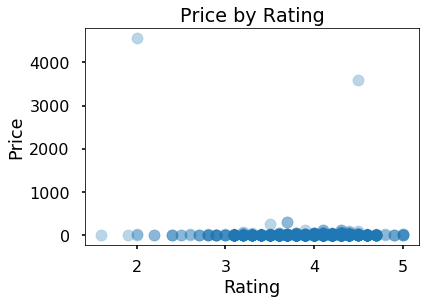

In [70]:
plt.scatter(x=raw1['rating'],y=raw1["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price by Rating')
plt.show()

We want to look at low-priced and drugstore skin products since the average customer would be interested in better understanding this subset of products. This would also help our scatter plot be more informative since we are taking out the outliers. We use the next print statement to make sure we are not taking out a large portion of our sample.

In [71]:
print(raw1.loc[raw1.price >=50])

                  category             brand  \
40             Night Cream         Sulwhasoo   
68             Night Cream           Kiehl's   
155               Face Oil      Sunday Riley   
157               Face Oil      Sunday Riley   
173          Eye Treatment           Lancome   
176          Eye Treatment             SK-II   
242         Acne Treatment               OXY   
243         Acne Treatment               OXY   
249        Serum & Essence             SK-II   
264        Serum & Essence           Lancome   
342             Mask Sheet             SK-II   
555      Lotion & Emulsion             SK-II   
569               Face Oil           Kiehl's   
571               Face Oil             NIVEA   
584          Eye Treatment      Estee Lauder   
588          Eye Treatment           Kiehl's   
595          Eye Treatment    Drunk Elephant   
604  Brow & Lash Treatment         RapidLash   
653        Serum & Essence           Kiehl's   
654        Serum & Essence      Estee La

Now, we make a new dataframe `skincare_subset` that has keeps only the subset of products that cost 50 USD or less. Next, we redid the scatter plot with the new subset. Ratings are skewed toward the right, and higher ratings do not indicate higher prices, but the products with higher prices generally land in the 4-rating range, with an outlier with the rating of 2.

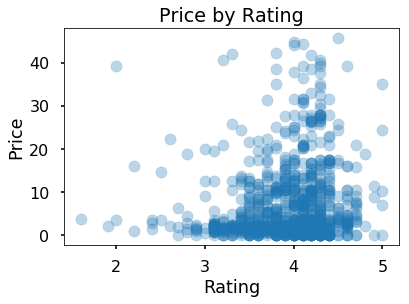

In [72]:
skincare_subset=raw1.loc[(raw1['price']<=50)]
plt.scatter(x=skincare_subset['rating'],y=skincare_subset["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price by Rating')
plt.show()

We looked at the unique categories of skin products that we had in our dataset and realized some of them were not for the skin. The next few cells create a new dataframe `skincare_subset2` that removes the following categories from our dataset: 'Eye Treatment', 'Brow & Lash Treatment', 'Peeling', 'Nose Pack', and 'Wash-Off'

In [73]:
#look at unique categories
print(skincare_subset.category.unique() )

['Night Cream' 'Face Mist' 'Day Cream' 'Sun Protection'
 'Lotion & Emulsion' 'Face Oil' 'Eye Treatment' 'Brow & Lash Treatment'
 'Skin Soothing Treatment' 'Acne Treatment' 'Serum & Essence' 'Peeling'
 'Sleeping Mask' 'Mask Sheet' 'Nose Pack' 'Wash-Off' 'Facial Wash'
 'Cream & Lotion' 'Oil' 'Makeup Remover' 'Scrub & Exfoliator' 'Toner']


In [74]:
#new subset with only face-specific categories
skincare_subset2=skincare_subset.loc[(skincare_subset['category']!= 'Eye Treatment') & (skincare_subset['category']!='Brow & Lash Treatment')& (skincare_subset['category']!='Peeling')& (skincare_subset['category']!='Nose Pack')& (skincare_subset['category']!='Wash-Off')]

In [75]:
#Confirm that categories were removed
print(skincare_subset2.category.unique())

['Night Cream' 'Face Mist' 'Day Cream' 'Sun Protection'
 'Lotion & Emulsion' 'Face Oil' 'Skin Soothing Treatment' 'Acne Treatment'
 'Serum & Essence' 'Sleeping Mask' 'Mask Sheet' 'Facial Wash'
 'Cream & Lotion' 'Oil' 'Makeup Remover' 'Scrub & Exfoliator' 'Toner']


We check the number of product entries that are $0 in the 'price' column within skincare_subset2:

In [76]:
print(len(skincare_subset2.loc[(skincare_subset2['price']==0)])) #number of 0s in 'price'

39


As you can see, there are 39 product entries that are $0, making the data skewed toward the left. <br>Here we remove prices that are 0 so that the data is not left-skewed:

In [77]:
#Remove Prices that are $0
price_subset = skincare_subset2.copy()
price_subset=price_subset.loc[(price_subset['price']!=0)]

We redid the scatter plot with the price_subset. Not much looks different from the previous scatter plot before we removed the 0s.

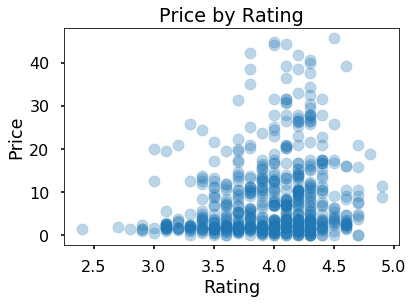

In [78]:
plt.scatter(x=price_subset['rating'],y=price_subset["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price by Rating')
plt.show()

This box plot looks at price by category. Most of the data is left-skewed with some tails toward the higher prices such as Emulsion and Oil. Oil and Sleeping Mask are generally higher with higher median prices. Mask Sheet has a small distribution of prices.

/Users/katehofer/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


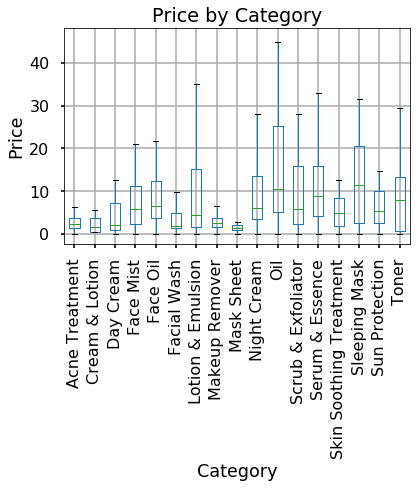

In [79]:
#Price by Category
plot=skincare_subset2.boxplot('price', by='category', rot=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price by Category')
plt.suptitle('')
plt.show()

This box plot looks at rating by category. All of the categories have median ratings either directly above or below 4.0. Mask sheet has the highest median while Day Cream has the lowest. There are no significant outliers.

/Users/katehofer/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


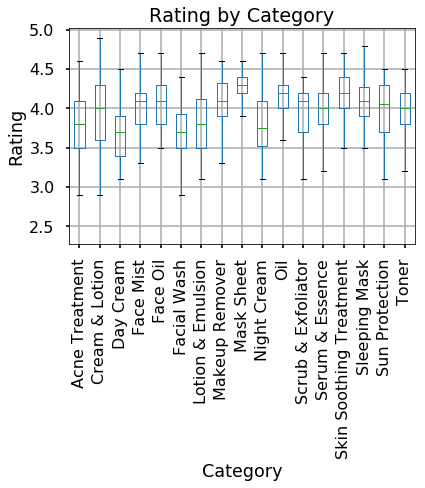

In [80]:
#Rating by Category
plot=skincare_subset2.boxplot('rating', by='category', rot=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Rating by Category')
plt.suptitle('')
plt.show()

Here the summary statistics of our cleaned data:

In [81]:
price_subset.describe()

,price,rating
count,613.000000,613.000000
mean,8.236146,3.954323
std,9.117507,0.406847
min,0.000700,2.400000
25%,1.890000,3.700000
50%,4.200000,4.000000
75%,11.340000,4.200000
max,45.850000,4.900000


These are the average ratings by category:

In [82]:
skincare_subset2.groupby(['category'])['rating'].mean()

category
Acne Treatment             3.770270
Cream & Lotion             3.910811
Day Cream                  3.660000
Face Mist                  3.992308
Face Oil                   4.068571
Facial Wash                3.687500
Lotion & Emulsion          3.790000
Makeup Remover             4.060000
Mask Sheet                 4.220513
Night Cream                3.828947
Oil                        4.131579
Scrub & Exfoliator         3.934211
Serum & Essence            3.969444
Skin Soothing Treatment    4.157500
Sleeping Mask              4.086842
Sun Protection             3.986842
Toner                      3.933333
Name: rating, dtype: float64

These are the average prices per category:

In [83]:
price_subset.groupby(['category'])['price'].mean()

category
Acne Treatment              5.015860
Cream & Lotion              4.035027
Day Cream                   8.295039
Face Mist                   7.748844
Face Oil                   11.250945
Facial Wash                 4.755306
Lotion & Emulsion           9.310190
Makeup Remover              4.397256
Mask Sheet                  1.671895
Night Cream                 9.141563
Oil                        14.644674
Scrub & Exfoliator         10.451142
Serum & Essence            14.310333
Skin Soothing Treatment     5.761009
Sleeping Mask              13.041328
Sun Protection              8.294960
Toner                      10.155742
Name: price, dtype: float64

These are the average ratings by brand:

In [84]:
skincare_subset2.groupby(['brand'])['rating'].mean()

brand
APIEU       3.800000
AVOSKIN     4.233333
Acnes       3.462500
Acnol       4.000000
Ariul       4.175000
              ...   
Wardah      3.491111
Watsons     4.200000
Whitelab    4.500000
iUNIK       4.000000
the SAEM    3.925000
Name: rating, Length: 161, dtype: float64

These are the average prices by brand:

In [85]:
price_subset.groupby(['brand'])['price'].mean()

brand
AVOSKIN           15.796667
Acnes              2.003750
Acnol              1.050000
Ariul              1.050000
Avene             13.930000
                    ...    
Viva Cosmetics     0.603766
Wardah             2.709378
Watsons            6.650000
Whitelab           5.250000
the SAEM           8.312500
Name: price, Length: 156, dtype: float64

## Data description and analysis for merged Ulta and Sephora dataset that did not end up in the main paper since the results were insignificant 

### Dataset 2 (Ulta dataset):
What are the observations (rows) and the attributes (columns)?
- The observations are the face moisturizer products listed on the Ulta website. The attributes are the product's brand, name, price(\$), rating, and a list of ingredients.

Why was this dataset created?
- This data set was created to accompany the Sephora dataset we have. The dataset includes more products to see if there are relationships present between product ingredients, ratings, and price that were overrepresented or underrepresented by only looking at the Sephora website data.

Who funded the creation of the dataset?
- No one funded the creation of this dataset. Our group used Python’s Selenium package to web scrape public data from Ulta's website to build this dataset.

What processes might have influenced what data was observed and recorded and what was not?
- Due to the complicated nature of web scraping Ulta's website, it was not feasible to get all skin care products in a timely manner. Therefore, we decided to focus on just the face moisturizer category of products. Because of the limitations, we specifically chose facial moisturizer out of all skincare products because it is one of the most essential steps in skin care and is a product that stays on the skin for an extended period without being washed off unlike cleansers. 
- We used Selenium WebDriver to webscrape. In this process we had to extract specific xpaths to get all of the attributes of a product. We then looped over every face moisturizer to get all the information for each product. Some product's attributes were not at the same xpath as the first product we used, so some data was not recorded. To remedy this, we manually filled in the missing data that was not successfully web scraped.

What preprocessing was done, and how did the data come to be in the form that you are using?
- As briefly mentioned above, we used Selenium WebDriver to webscrape Ulta's face moisturizer website page. We looped through each face moisturizer product to extract its attributes and stored it in a CSV file. We had 7 CSV files (one for each page of products) that we combined into one larger CSV file. The CSV file was then downloaded and opened in Excel where we manually filled in the missing data that was not successfully web scraped. Additionally, we removed all products that were mini, travel size, or kits. This is because mini and travel size products were duplicates of their full size counterparts and would also skew and distract any analysis regarding price. We also removed any products that were kits or sets of several products bundled together because it would affect the rating. We are not able to pin down which product within the set was good or bad. To add on, we decided to remove kits and sets since the focus of our analysis was to get individual products and not the combination of products. Finally, we imported the CSV file into our notebook and saved it as a dataframe to use for our analyses. 
 
If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
- No people were involved.

Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).
- Our raw data can be found in our group's Github [here](https://github.com/elitagao/info2950/blob/main/final_ulta.csv).


In [44]:
final_merged = pd.read_csv('final_merged.csv')

In [45]:
final_merged.head()

,brand,name,price,rating,ingredients,contains_parabens
0,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0
1,SK-II,Facial Treatment Essence,179.0,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1
2,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,0
3,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",0
4,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,-Collagen: Supports skin elasticity for a yout...,0


In [46]:
final_merged.shape

(903, 6)

In [47]:
final_merged=final_merged.dropna()
final_merged.shape

(886, 6)

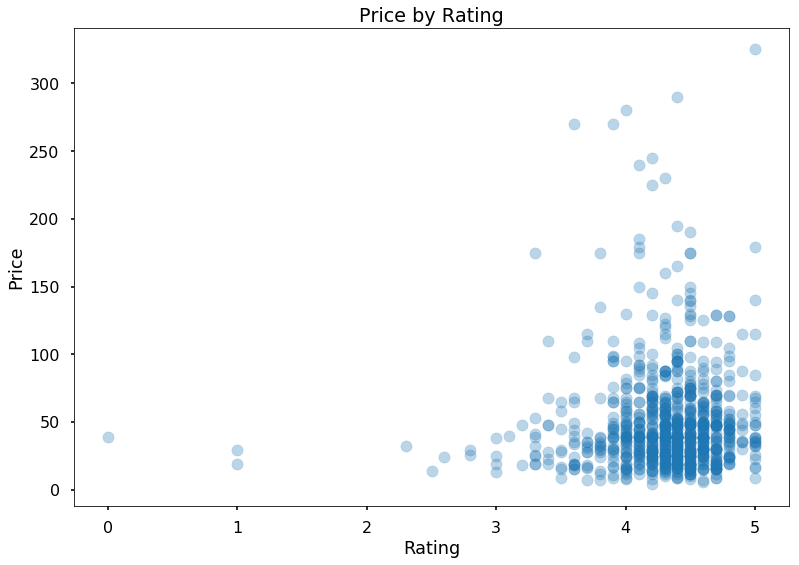

In [48]:
plt.scatter(x=final_merged['rating'],y=final_merged["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price by Rating')
plt.show()

In [49]:
mod = smf.ols(formula='rating ~ price', data=final_merged)

results = mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.258
Date:                Tue, 11 May 2021   Prob (F-statistic):              0.133
Time:                        17:37:24   Log-Likelihood:                -516.60
No. Observations:                 886   AIC:                             1037.
Df Residuals:                     884   BIC:                             1047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2825      0.024    179.288      0.0

R-squared is 0.002, meaning that there is a very low correlation between price and rating.

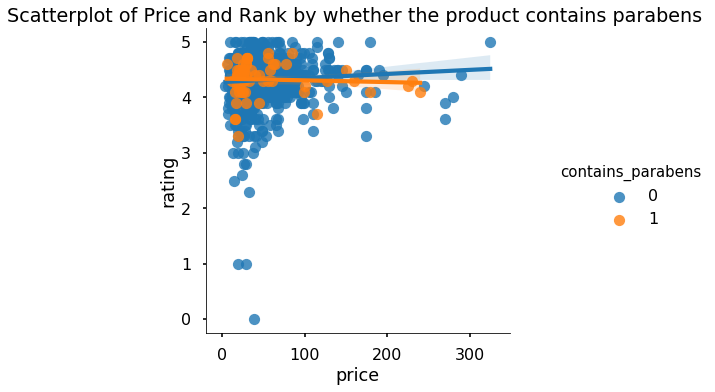

In [50]:
sns.lmplot(x='price', y='rating', data=final_merged, hue='contains_parabens')
plt.title('Scatterplot of Price and Rank by whether the product contains parabens ')
plt.show()

In [51]:
mod = smf.ols(formula='price ~ contains_parabens + rating', data=final_merged)

results = mod.fit()

print('OLS Results with Price as Dependent Variable:' )
print('\n')
print(results.summary())

OLS Results with Price as Dependent Variable:


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.584
Date:                Tue, 11 May 2021   Prob (F-statistic):              0.206
Time:                        17:37:28   Log-Likelihood:                -4473.0
No. Observations:                 886   AIC:                             8952.
Df Residuals:                     883   BIC:                             8966.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [52]:
#intercept's p-value is significant at 0.016

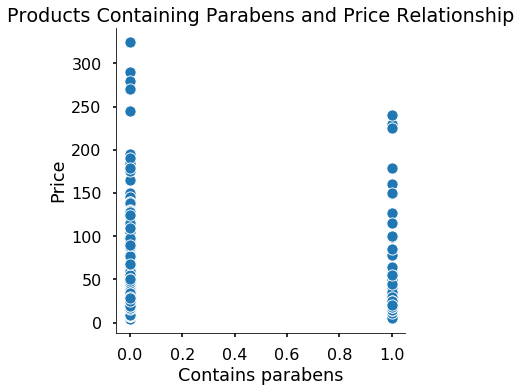

In [53]:
sns.relplot(data=final_merged, x='contains_parabens', y='price')
plt.title('Products Containing Parabens and Price Relationship')
plt.xlabel('Contains parabens')
plt.ylabel('Price')
plt.show()

In [54]:
final_merged['contains_parabens'].value_counts()

0    826
1     60
Name: contains_parabens, dtype: int64

In [55]:
1-(60/890)

0.9325842696629214

In [56]:
x_train, x_test = train_test_split(final_merged, test_size=0.2)
print('Training set')
print(x_train.head())
print('\n')
print('Test set')
print(x_test.head())

Training set
                  brand                                               name  \
544           BAD HABIT                Daily Dose Multivitamin Moisturizer   
203        ESTÉE LAUDER  Resilience Lift Firming/Sculpting Face and Nec...   
805  Kiehl's Since 1851                  Pure Vitality Skin Renewing Cream   
845               Vichy                             Aqualia Thermal CrÃ¨me   
737               ACURE                     Seriously Soothing Cloud Cream   

      price  rating                                        ingredients  \
544   24.00     3.6  Water (Aqua), Dicaprylyl Carbonate, Glycerin, ...   
203  108.00     4.1  Res Lift Firm/Sclp Face Nc Spf15 Division: El ...   
805   65.00     3.6  Butyrospermum Parkii Butter/Shea Butter, Undec...   
845    8.50     3.9  Aqua/Water, Glycerin, Dimethicone, Caprylic/Ca...   
737   18.99     4.2  Water (Aqua), Persea Gratissima (Avocado) Oil,...   

     contains_parabens  
544                  0  
203                  0 

In [57]:
lregression = LogisticRegression().fit(x_train[['price']], x_train['contains_parabens'])
print('Logistic Regression Coefficient is ', lregression.coef_[0][0])
y_pred = lregression.predict(x_test[['price']])
b=np.sum(y_pred==x_test['contains_parabens'])/len(y_pred)
answer=(b*100).round(1)
print('Prediction accuracy of this model is',answer,'%')

Logistic Regression Coefficient is  0.0025295347718137587
Prediction accuracy of this model is 94.4 %


In [58]:
#prediction accuracy model is actually worse because 90.4% is less than 93.3%

Train test split to predict whether the product contains parabens, given the rating

In [59]:
x_train2, x_test2 = train_test_split(final_merged, test_size=0.8)
print('Training set')
print(x_train2.head())
print('\n')
print('Test set')
print(x_test2.head())

Training set
               brand                                               name  \
503             Olay            Regenerist Whip Face Moisturizer SPF 40   
705  Alpha Skin Care                             Enhanced Renewal Cream   
895         Clarisma              Cali Dreaming Cream Daily Moisturizer   
423         Clinique            Clinique iD Dramatically Different Base   
703          Garnier  Green Labs Hyalu-Melon Replumping Serum Cream ...   

     price  rating                                        ingredients  \
503  38.99     4.5  Active: Avobenzone 3.0%, Homosalate 10.0%, Oct...   
705  17.99     4.7  Water, Glycolic Acid, Ammonium Hydroxide, Cety...   
895  16.99     3.5  Water (Aqua), Undecane, Glycerin, Triheptanoin...   
423  25.00     4.3  Water\Aqua\Eau, Propanediol, Glycerin, Butylen...   
703  21.99     4.4  Active: Avobenzone 3%, Homosalate 5%, Octisala...   

     contains_parabens  
503                  0  
705                  0  
895                  0

In [60]:
logfit= LogisticRegression().fit(x_train2[['rating']], x_train2['contains_parabens'])
print('Logistic Regression Coefficient is ', logfit.coef_[0][0])
testscore = logfit.score(x_test2[['rating']],x_test2['contains_parabens'])
print('Prediction accuracy of the model is: {:.1%}'.format(testscore))


Logistic Regression Coefficient is  -0.22507175028468954
Prediction accuracy of the model is: 92.7%


In [61]:
#93.4% is around the same as 93.3%, and is a slightly better prediction model than for price
#just by chance since there are so few products that contain parabens

Markdown

In [62]:
merged_model = LogisticRegression().fit(final_merged[['price']], final_merged['contains_parabens'])
print('Coefficient: ', merged_model.coef_[0][0])
print('Intercept: ', merged_model.intercept_[0])

Coefficient:  0.002959467368818932
Intercept:  -2.7730900902341102


In [63]:
def logit(x):
    return np.exp(x) / (np.exp(x) + 1)

In [64]:
m = merged_model.coef_[0][0]
b = merged_model.intercept_[0]
price = 40
x = m * price + b
print('Probability that a product that costs $40 contains parabens is:', logit(x))

price2 = 80
x2 = m * price2 + b
print('Probability that a product that costs $80 contains parabens is:', logit(x2))

price3 = 300
x3 = m * price3 + b
print('Probability that a product that costs $300 contains parabens is:', logit(x3))

Probability that a product that costs $40 contains parabens is: 0.06569921827470397
Probability that a product that costs $80 contains parabens is: 0.07335004940899563
Probability that a product that costs $300 contains parabens is: 0.13178702445870827


As price increases, the probability that the product will contain parabens also increases.

In [65]:
merged_rating = LogisticRegression().fit(final_merged[['rating']], final_merged['contains_parabens'])
print('Coefficient: ', merged_rating.coef_[0][0])
print('Intercept: ', merged_rating.intercept_[0])
m = merged_rating.coef_[0][0]
b = merged_rating.intercept_[0]
rating = 1
x = m * rating + b
print('Probability of a product with rank 1 containing parabens:', logit(x))

rating2 = 2
x = m * rating2 + b
print('Probability of a product with rank 2 containing parabens:', logit(x))

rating3 = 3
x = m * rating3 + b
print('Probability of a product with rank 3 containing parabens:', logit(x))

rating4 = 4
x = m * rating4 + b
print('Probability of a product with rank 4 containing parabens:', logit(x))

rating5 = 5
x = m * rating5 + b
print('Probability of a product with rank 5 containing parabens:', logit(x))

Coefficient:  0.04815321315513124
Intercept:  -2.830014850100905
Probability of a product with rank 1 containing parabens: 0.05831224537331978
Probability of a product with rank 2 containing parabens: 0.06101335832872713
Probability of a product with rank 3 containing parabens: 0.06383110991278441
Probability of a product with rank 4 containing parabens: 0.06676973902197092
Probability of a product with rank 5 containing parabens: 0.06983356370507089


As the rating increases, the probability that the product will contain parabens increases. This is different from the ulta dataset, where as rank increased, probability of containing parabens decreased.

### T-test

In [66]:
subset1=final_merged.loc[(final_merged['contains_parabens']==0)]
subset2=final_merged.loc[(final_merged['contains_parabens']==1)]
print(stats.levene(subset1['price'], subset2['price']))

LeveneResult(statistic=6.095396328752658, pvalue=0.013741564062122803)


In [67]:
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= False)
print(ttest)

Ttest_indResult(statistic=-0.6635385471795419, pvalue=0.5094206659641752)


The p value for this test is 0.52. Since our P value is more than our significant level of 0.05, we fail to reject the null hypothesis and cannot accept the alternative hypothesis. In other words, there is no statistically significant difference between the mean price of products with and without parabens. This is different from the Sephora dataset, where there *is* a significance.

In [68]:
subset_rating=final_merged.loc[(final_merged['contains_parabens']==0)]
subset_rating2=final_merged.loc[(final_merged['contains_parabens']==1)]
print(stats.levene(subset_rating['rating'], subset_rating2['rating']))

LeveneResult(statistic=2.0463882901720822, pvalue=0.1529211149003639)


In [69]:
ttest= stats.ttest_ind(subset_rating['rating'], subset_rating2['rating'], equal_var= True)
print(ttest)

Ttest_indResult(statistic=-0.1671155895350971, pvalue=0.867317318908812)


The p value for this test is 0.86. Since our P value is not smaller than our significant level of 0.05, we fail to reject null hypoethesis. In other words, there is no statistically significant difference between the mean rating of products with and without parabens.